In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

C:\Users\PC\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 1. Data Analysis

# 1.1  Analyse de forme :

In [2]:
url = 'https://raw.githubusercontent.com/MachineLearnia/Python-Machine-Learning/master/Dataset/dataset.csv'
data = pd.read_csv(url, index_col=0, encoding = "ISO-8859-1")

In [3]:
pd.set_option('display.max_row', 110)
pd.set_option('display.max_columns', 110)

In [4]:
data.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
Patient ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
df = data.copy()

In [6]:
df.shape

(5644, 110)

In [7]:
df.dtypes.value_counts()

float64    70
object     36
int64       4
dtype: int64

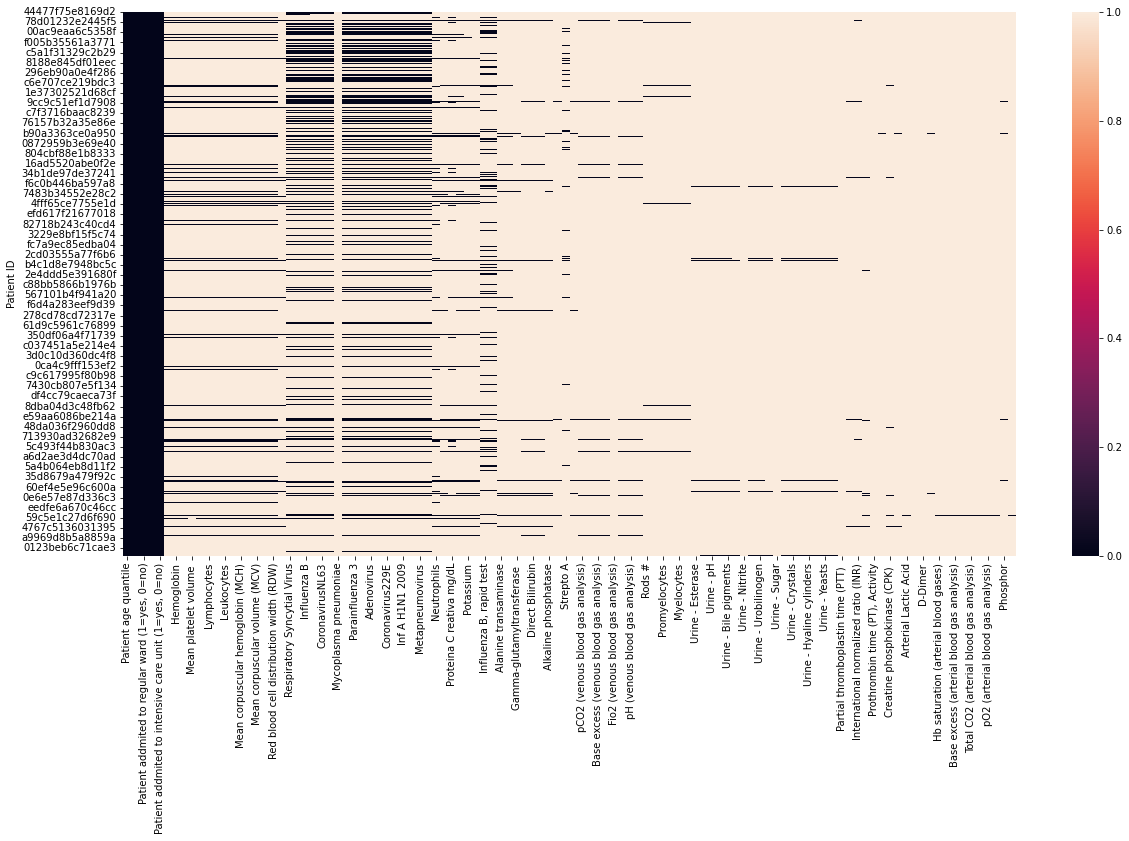

In [8]:
plt.figure(figsize = (20,10))
sns.heatmap(df.isna())
plt.show()

In [9]:
(df.isna().sum()/len(df)).sort_values(ascending = True)

Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Rhinovirus/Enterovirus                                   0.760454
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydophila pneumoniae                                 0.760454
Parainflue

# 1.2 Analyse de fond

# 1.2.1 Elimination des varaibles inutiles

In [10]:
df = df[df.columns[df.isna().sum()/len(df) < 0.9]]

In [11]:
df

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
Patient ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ae66feb9e4dc3a0,3,positive,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
517c2834024f3ea,17,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5c57d6037fe266d,4,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.dtypes.value_counts()

object     20
float64    14
int64       4
dtype: int64

# 1.2.2 Target after transformation

In [13]:
target = 'SARS-Cov-2 exam result'

In [14]:
df[target].unique()

array(['negative', 'positive'], dtype=object)

In [15]:
df[target].value_counts()

negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64

In [16]:
df[target].value_counts(normalize = True)

negative    0.901134
positive    0.098866
Name: SARS-Cov-2 exam result, dtype: float64

# 1.2.3 Variable distribution 

In [17]:
for col in df.select_dtypes('float'):
    print(col , '__________________________' ,  len(df[col].unique()) , ',' , len(df[col]))
   

Hematocrit __________________________ 177 , 5644
Hemoglobin __________________________ 85 , 5644
Platelets __________________________ 250 , 5644
Mean platelet volume  __________________________ 49 , 5644
Red blood Cells __________________________ 212 , 5644
Lymphocytes __________________________ 319 , 5644
Mean corpuscular hemoglobin concentration (MCHC) __________________________ 58 , 5644
Leukocytes __________________________ 476 , 5644
Basophils __________________________ 18 , 5644
Mean corpuscular hemoglobin (MCH) __________________________ 92 , 5644
Eosinophils __________________________ 87 , 5644
Mean corpuscular volume (MCV) __________________________ 191 , 5644
Monocytes __________________________ 147 , 5644
Red blood cell distribution width (RDW) __________________________ 62 , 5644


C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


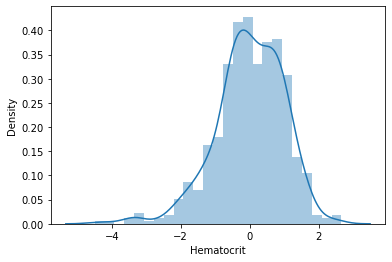

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


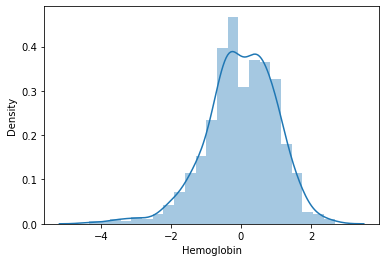

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


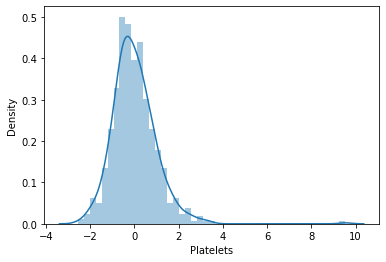

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


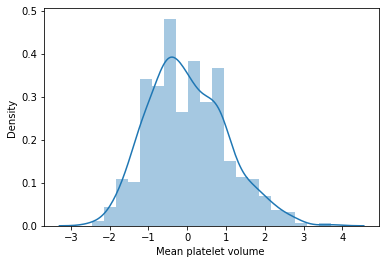

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


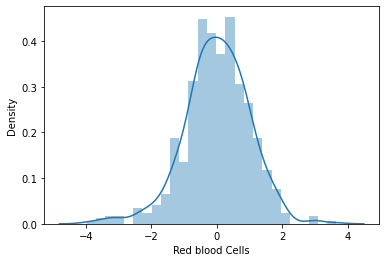

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


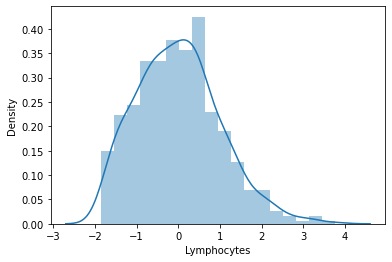

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


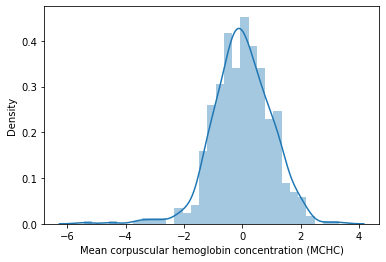

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


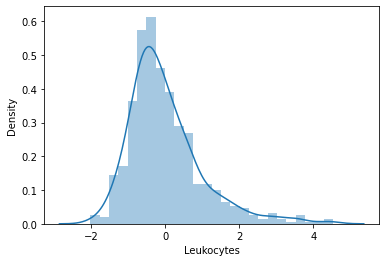

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


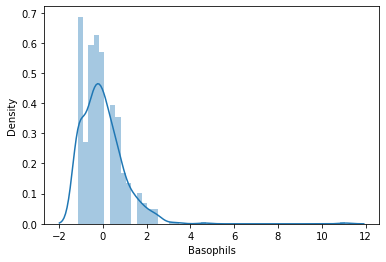

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


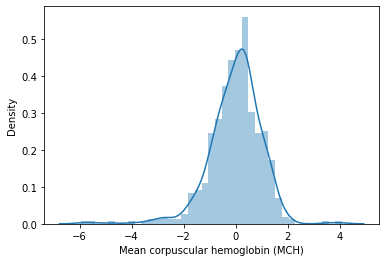

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


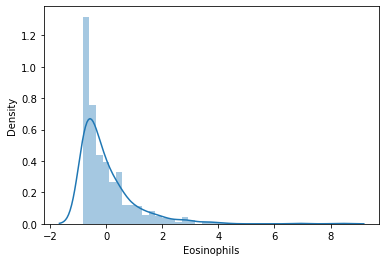

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


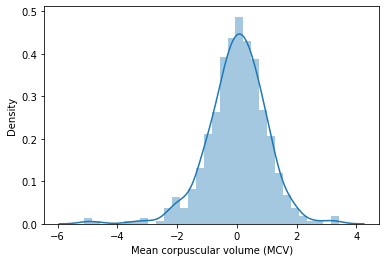

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


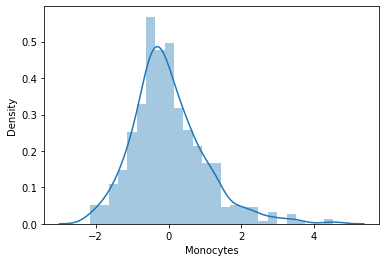

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


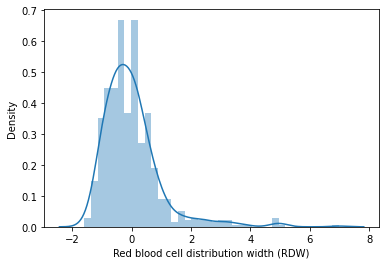

In [18]:
for col in df.select_dtypes('float'):
    sns.distplot(df[col])
    plt.show()

In [19]:
for col in df.select_dtypes('int64'):
    print(col , '__________________________' ,  len(df[col].unique()) , ':', df[col].unique() ,':' , len(df[col]) )
   

Patient age quantile __________________________ 20 : [13 17  8  5 15  9 16  1 14 11  0  3 10  6 12 19  7 18  2  4] : 5644
Patient addmited to regular ward (1=yes, 0=no) __________________________ 2 : [0 1] : 5644
Patient addmited to semi-intensive unit (1=yes, 0=no) __________________________ 2 : [0 1] : 5644
Patient addmited to intensive care unit (1=yes, 0=no) __________________________ 2 : [0 1] : 5644


C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


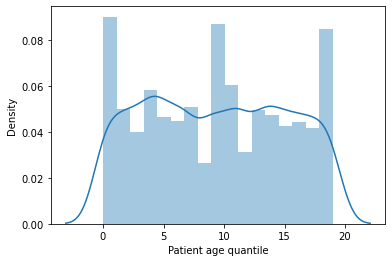

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


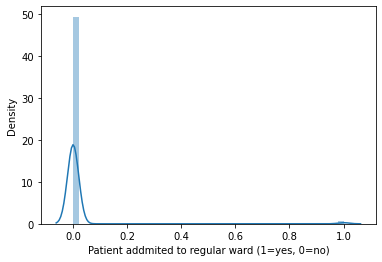

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


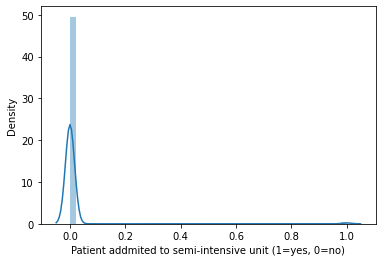

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


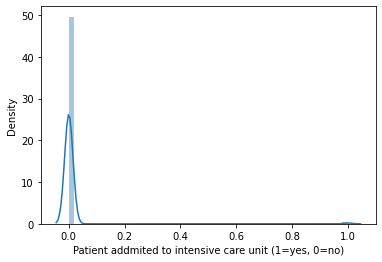

In [66]:
for col in df.select_dtypes('int'):
    sns.distplot(df[col])
    plt.show()

In [20]:
for col in df.select_dtypes('O'):
    print(col , '__________________________' ,  len(df[col].unique()) , ',' , len(df[col]) , ':' , df[col].unique())

SARS-Cov-2 exam result __________________________ 2 , 5644 : ['negative' 'positive']
Respiratory Syncytial Virus __________________________ 3 , 5644 : [nan 'not_detected' 'detected']
Influenza A __________________________ 3 , 5644 : [nan 'not_detected' 'detected']
Influenza B __________________________ 3 , 5644 : [nan 'not_detected' 'detected']
Parainfluenza 1 __________________________ 3 , 5644 : [nan 'not_detected' 'detected']
CoronavirusNL63 __________________________ 3 , 5644 : [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus __________________________ 3 , 5644 : [nan 'detected' 'not_detected']
Coronavirus HKU1 __________________________ 3 , 5644 : [nan 'not_detected' 'detected']
Parainfluenza 3 __________________________ 3 , 5644 : [nan 'not_detected' 'detected']
Chlamydophila pneumoniae __________________________ 3 , 5644 : [nan 'not_detected' 'detected']
Adenovirus __________________________ 3 , 5644 : [nan 'not_detected' 'detected']
Parainfluenza 4 _______________________

# 1.2.4 Relation Target/variable 

In [21]:
df_positive = df[df[target] == 'positive']
df_negative = df[df[target] == 'negative']

In [27]:
df_positive

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
Patient ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
78511c183ae18bc,7,positive,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d7834ed75f2da44,16,positive,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN
b16b49f7bd3e692,10,positive,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN
4382f5ea05e60c4,2,positive,0,0,0,0.991838,0.792188,-0.341548,1.469188,1.653476,-0.048383,-0.452899,-0.420197,1.303529,-1.442245,-0.498393,-1.396114,1.933339,0.967144,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN
d3729cd2658ca64,15,positive,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5c386388ba3c3f0,16,positive,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9f8dfe2ae239238,4,positive,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
db77903261ab6d0,15,positive,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df_negative

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
Patient ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2ea15fb0c220027,12,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21af7c93c7fc540,14,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
517c2834024f3ea,17,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
missing_value = df.isna().sum()/len(df)

In [30]:
blood_set = df.columns[(missing_value < 0.9) & (missing_value > 0.88)]

In [31]:
viral_set = df.columns[(missing_value < 0.88) & (missing_value > 0.75)]

In [37]:
for col in blood_set :
    print(col , '________________' , df[col].dtypes  )

Hematocrit ________________ float64
Hemoglobin ________________ float64
Platelets ________________ float64
Mean platelet volume  ________________ float64
Red blood Cells ________________ float64
Lymphocytes ________________ float64
Mean corpuscular hemoglobin concentration (MCHC) ________________ float64
Leukocytes ________________ float64
Basophils ________________ float64
Mean corpuscular hemoglobin (MCH) ________________ float64
Eosinophils ________________ float64
Mean corpuscular volume (MCV) ________________ float64
Monocytes ________________ float64
Red blood cell distribution width (RDW) ________________ float64


C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


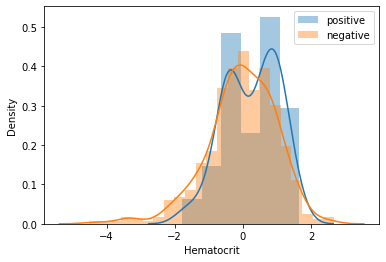

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


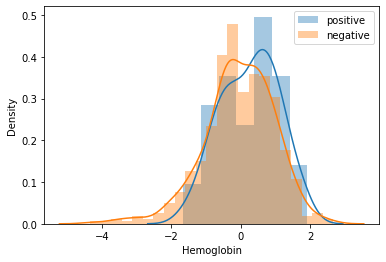

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


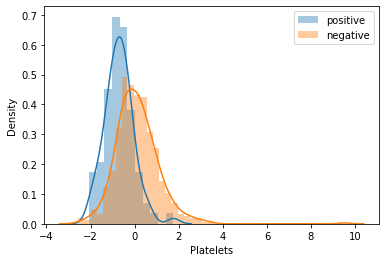

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


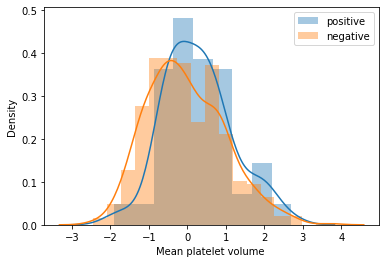

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


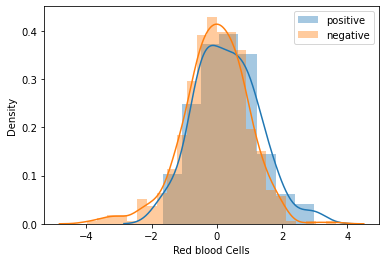

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


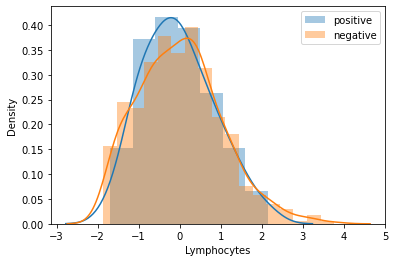

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


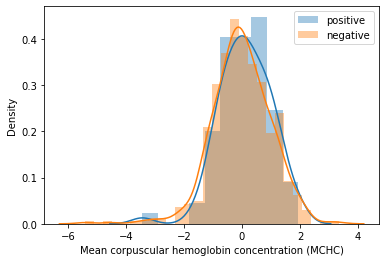

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


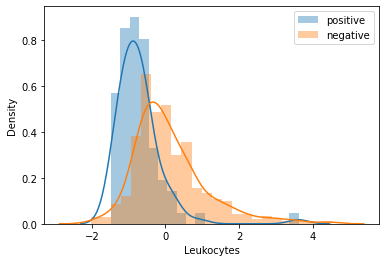

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


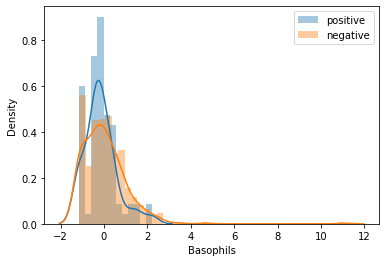

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


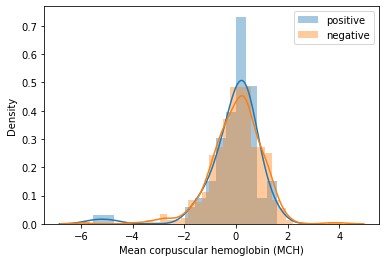

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


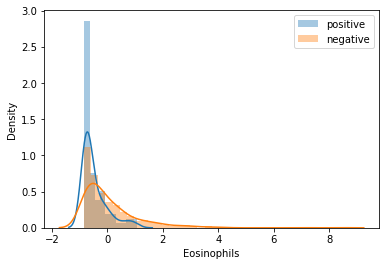

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


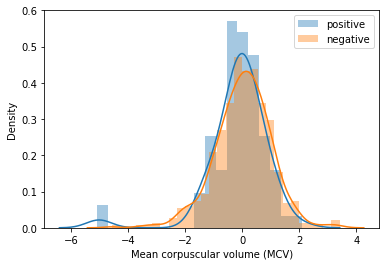

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


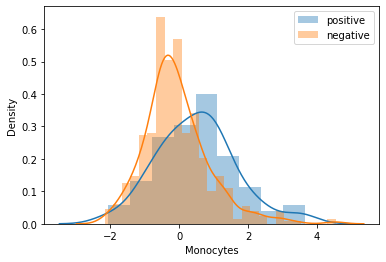

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


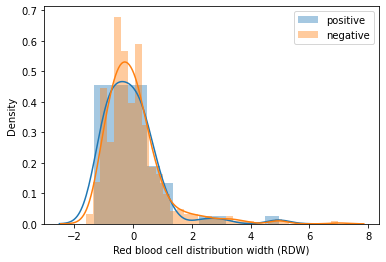

In [33]:
for col in blood_set :
    
    sns.distplot(df_positive[col], label = 'positive')
    sns.distplot(df_negative[col], label = 'negative')
    plt.legend()
    plt.show()

In [34]:
for col in viral_set :
    print(col , '________________' , df[col].dtypes , '____________',df[col].unique())

Respiratory Syncytial Virus ________________ object ____________ [nan 'not_detected' 'detected']
Influenza A ________________ object ____________ [nan 'not_detected' 'detected']
Influenza B ________________ object ____________ [nan 'not_detected' 'detected']
Parainfluenza 1 ________________ object ____________ [nan 'not_detected' 'detected']
CoronavirusNL63 ________________ object ____________ [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus ________________ object ____________ [nan 'detected' 'not_detected']
Coronavirus HKU1 ________________ object ____________ [nan 'not_detected' 'detected']
Parainfluenza 3 ________________ object ____________ [nan 'not_detected' 'detected']
Chlamydophila pneumoniae ________________ object ____________ [nan 'not_detected' 'detected']
Adenovirus ________________ object ____________ [nan 'not_detected' 'detected']
Parainfluenza 4 ________________ object ____________ [nan 'not_detected' 'detected']
Coronavirus229E ________________ object _________

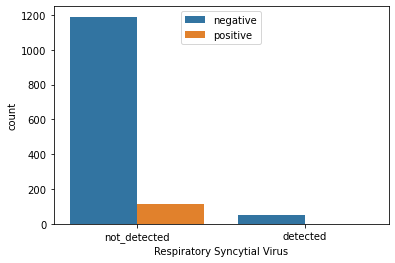

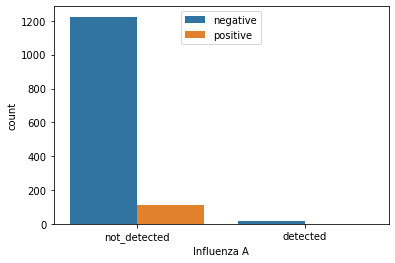

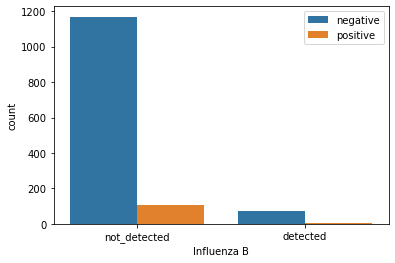

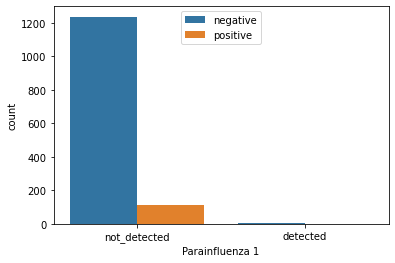

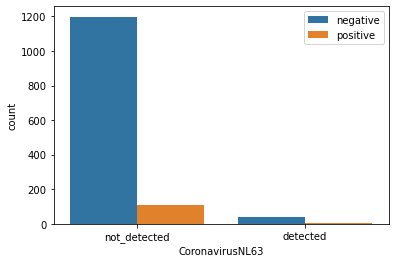

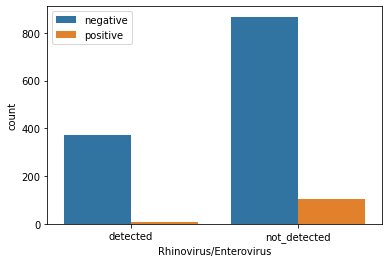

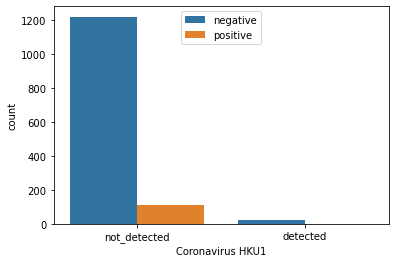

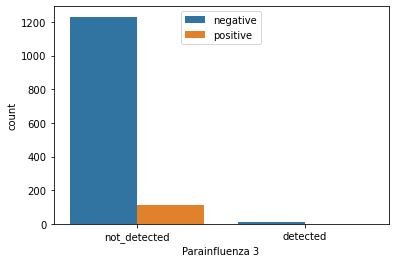

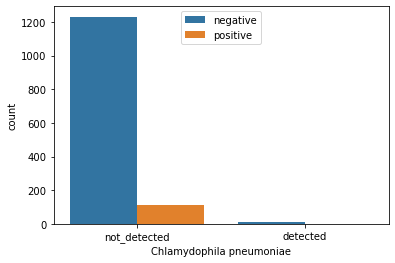

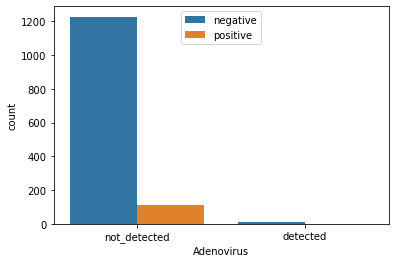

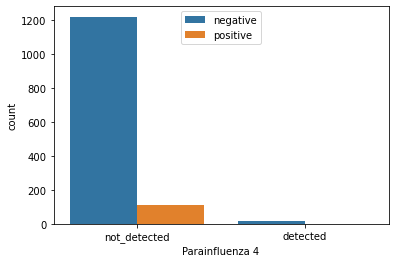

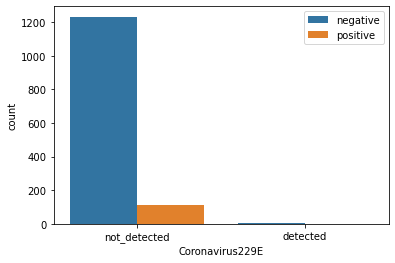

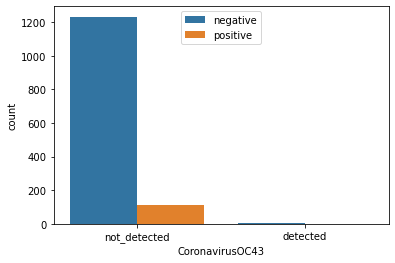

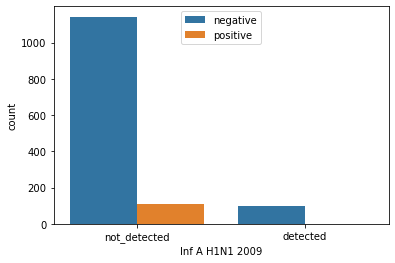

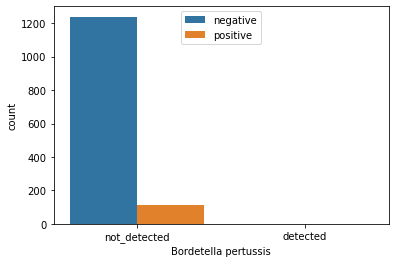

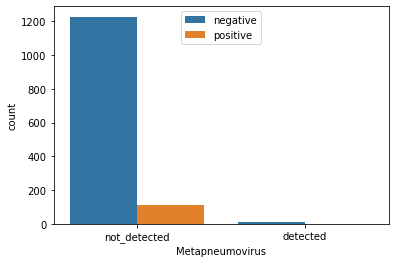

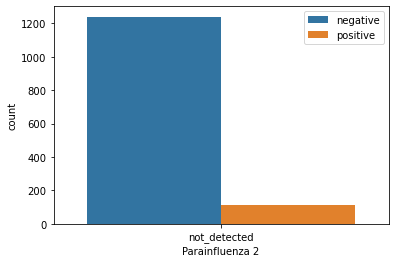

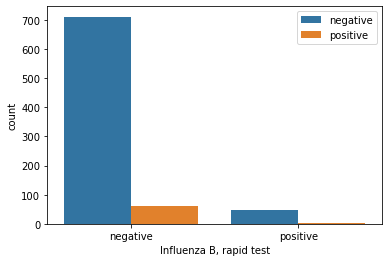

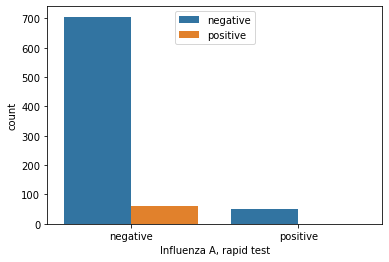

In [123]:
for col in viral_set :
    
    sns.countplot(x = col, hue = target,  data = df)
   
    plt.legend()
    plt.show()

In [38]:
residual_set = []
for col in df.columns :
    col_set = list(blood_set) + list(viral_set)
    if col not in col_set :
        residual_set.append(col)
residual_set

['Patient age quantile',
 'SARS-Cov-2 exam result',
 'Patient addmited to regular ward (1=yes, 0=no)',
 'Patient addmited to semi-intensive unit (1=yes, 0=no)',
 'Patient addmited to intensive care unit (1=yes, 0=no)']

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


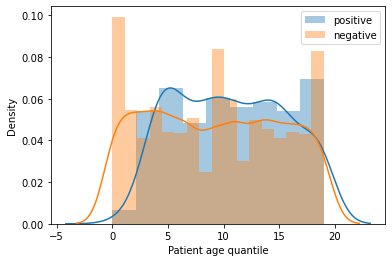

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


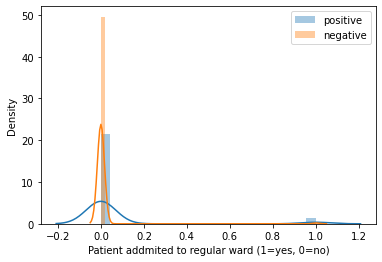

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


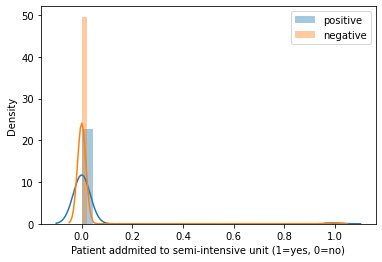

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


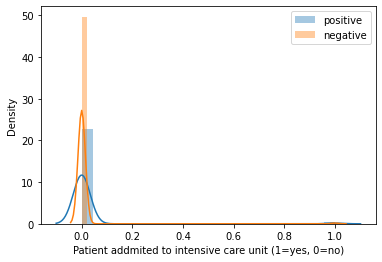

In [40]:
for col in residual_set:
    if col != target :
        sns.distplot(df_positive[col], label = 'positive')
        sns.distplot(df_negative[col], label = 'negative')

        plt.legend()
        plt.show()

# 1.3 Analyse plus détaillée

# 1.3.1 Relation variable/variable 

# 1. Blood/Blood

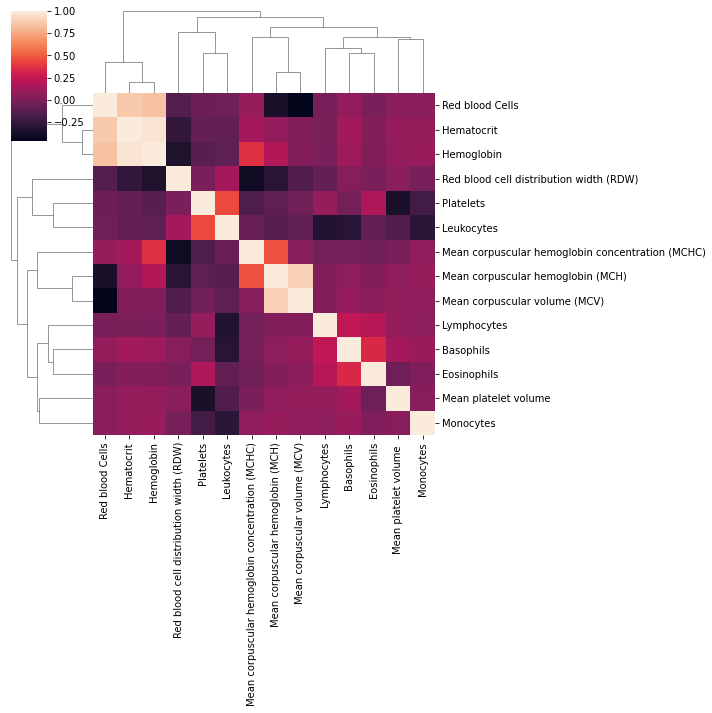

In [41]:
sns.clustermap(df[blood_set].corr()) # éviter sns.pairplot(df[blood_set]) pour les grnades dimensiosn 

# 2. Blood/age

In [44]:
df.corr()['Patient age quantile'].sort_values()

Leukocytes                                              -0.166386
Platelets                                               -0.158683
Lymphocytes                                             -0.125935
Mean corpuscular hemoglobin concentration (MCHC)        -0.124671
Red blood Cells                                         -0.037510
Patient addmited to intensive care unit (1=yes, 0=no)   -0.035772
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.015736
Eosinophils                                              0.022085
Patient addmited to regular ward (1=yes, 0=no)           0.046166
Monocytes                                                0.050962
Hemoglobin                                               0.060320
Hematocrit                                               0.096808
Basophils                                                0.107525
Mean platelet volume                                     0.119449
Red blood cell distribution width (RDW)                  0.166429
Mean corpu

# 3. Viral/Viral

In [45]:
df[viral_set].dtypes 


Respiratory Syncytial Virus    object
Influenza A                    object
Influenza B                    object
Parainfluenza 1                object
CoronavirusNL63                object
Rhinovirus/Enterovirus         object
Coronavirus HKU1               object
Parainfluenza 3                object
Chlamydophila pneumoniae       object
Adenovirus                     object
Parainfluenza 4                object
Coronavirus229E                object
CoronavirusOC43                object
Inf A H1N1 2009                object
Bordetella pertussis           object
Metapneumovirus                object
Parainfluenza 2                object
Influenza B, rapid test        object
Influenza A, rapid test        object
dtype: object

In [47]:
df[viral_set]

,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
Patient ID,,,,,,,,,,,,,,,,,,,
44477f75e8169d2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126e9dd13932f68,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
a46b4402a0e5696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f7d619a94f97c45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d9e41465789c2b5,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ae66feb9e4dc3a0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
517c2834024f3ea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5c57d6037fe266d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
pd.get_dummies(df[viral_set])

,Respiratory Syncytial Virus_detected,Respiratory Syncytial Virus_not_detected,Influenza A_detected,Influenza A_not_detected,Influenza B_detected,Influenza B_not_detected,Parainfluenza 1_detected,Parainfluenza 1_not_detected,CoronavirusNL63_detected,CoronavirusNL63_not_detected,Rhinovirus/Enterovirus_detected,Rhinovirus/Enterovirus_not_detected,Coronavirus HKU1_detected,Coronavirus HKU1_not_detected,Parainfluenza 3_detected,Parainfluenza 3_not_detected,Chlamydophila pneumoniae_detected,Chlamydophila pneumoniae_not_detected,Adenovirus_detected,Adenovirus_not_detected,Parainfluenza 4_detected,Parainfluenza 4_not_detected,Coronavirus229E_detected,Coronavirus229E_not_detected,CoronavirusOC43_detected,CoronavirusOC43_not_detected,Inf A H1N1 2009_detected,Inf A H1N1 2009_not_detected,Bordetella pertussis_detected,Bordetella pertussis_not_detected,Metapneumovirus_detected,Metapneumovirus_not_detected,Parainfluenza 2_not_detected,"Influenza B, rapid test_negative","Influenza B, rapid test_positive","Influenza A, rapid test_negative","Influenza A, rapid test_positive"
Patient ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
44477f75e8169d2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
126e9dd13932f68,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,1,0,1,0
a46b4402a0e5696,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
f7d619a94f97c45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
d9e41465789c2b5,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ae66feb9e4dc3a0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
517c2834024f3ea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5c57d6037fe266d,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
len(pd.get_dummies(df[viral_set]).columns)

37

<AxesSubplot:>

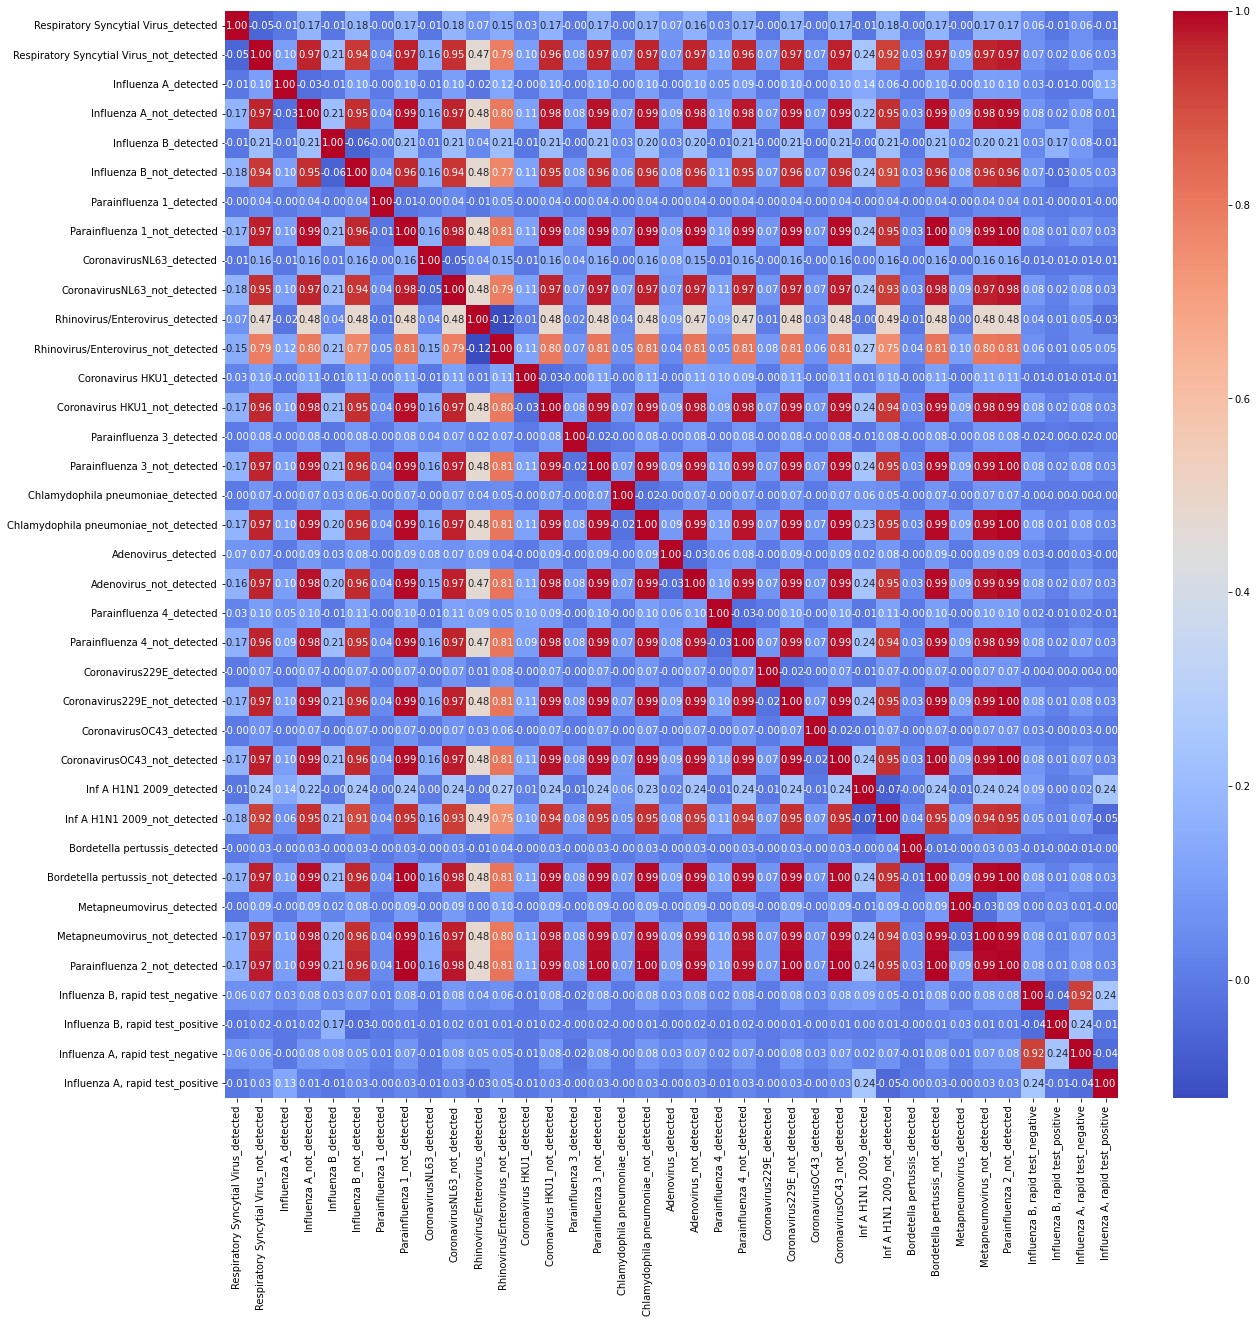

In [50]:
plt.figure(figsize=(20, 20))
sns.heatmap(pd.get_dummies(df[viral_set]).corr(), annot=True, cmap='coolwarm', fmt=".2f")

# Blood/hospitalité

In [53]:
df.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
Patient ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN


In [108]:
hos_set = list(['Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)'])
columns = hos_set + list(blood_set)
df_hos_blood = df[columns]

In [109]:
def objected(row , col) :
    if row[col] == 1 :
        return 'yes'
    elif  row[col] == 0 :
        return 'no'
    
df_hos_blood['Patient addmited to regular ward'] = df_hos_blood.apply(
    lambda row: objected(row, col='Patient addmited to regular ward (1=yes, 0=no)'), axis=1)

df_hos_blood['Patient addmited to semi-intensive unit'] = df_hos_blood.apply(
    lambda row: objected(row, col='Patient addmited to semi-intensive unit (1=yes, 0=no)'), axis=1)

df_hos_blood['Patient addmited to to intensive care unit '] = df_hos_blood.apply(
    lambda row: objected(row, col='Patient addmited to intensive care unit (1=yes, 0=no)'), axis=1)


C:\Users\PC\AppData\Local\Temp\ipykernel_13216\4187990999.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hos_blood['Patient addmited to regular ward'] = df_hos_blood.apply(
C:\Users\PC\AppData\Local\Temp\ipykernel_13216\4187990999.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hos_blood['Patient addmited to semi-intensive unit'] = df_hos_blood.apply(
C:\Users\PC\AppData\Local\Temp\ipykernel_13216\4187990999.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [110]:
df_hos_blood

,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Patient addmited to regular ward,Patient addmited to semi-intensive unit,Patient addmited to to intensive care unit
Patient ID,,,,,,,,,,,,,,,,,,,,
44477f75e8169d2,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,no,no
126e9dd13932f68,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,no,no,no
a46b4402a0e5696,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,no,no
f7d619a94f97c45,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,no,no
d9e41465789c2b5,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ae66feb9e4dc3a0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,no,no
517c2834024f3ea,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,no,no
5c57d6037fe266d,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,no,no


In [134]:
df_Patient_addmited_to_regular_ward_YES = df_hos_blood[df_hos_blood['Patient addmited to regular ward'] == 'yes']
df_Patient_addmited_to_regular_ward_NO = df_hos_blood[df_hos_blood['Patient addmited to regular ward'] == 'no']

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


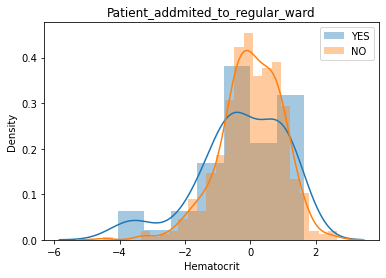

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


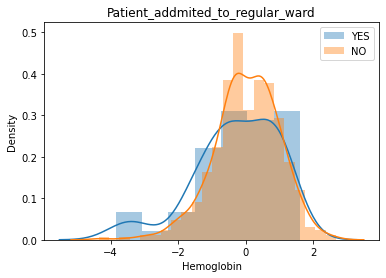

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


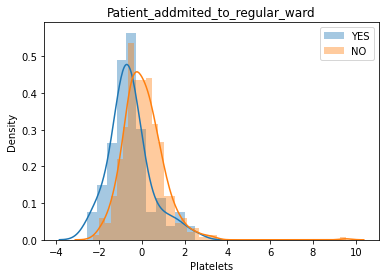

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


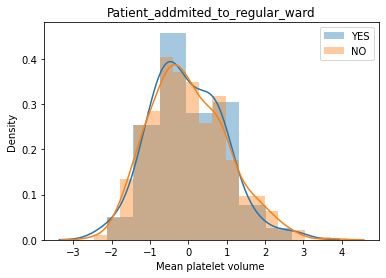

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


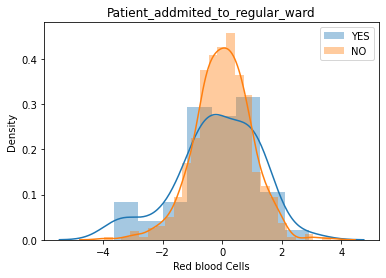

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


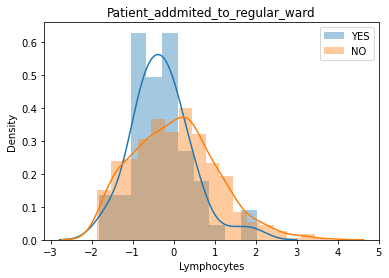

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


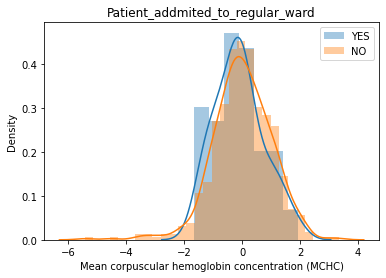

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


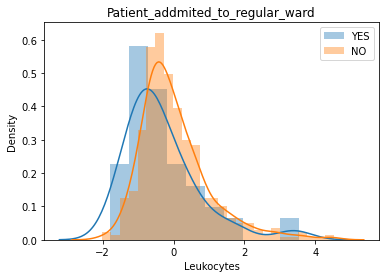

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


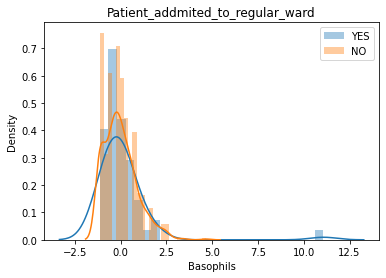

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


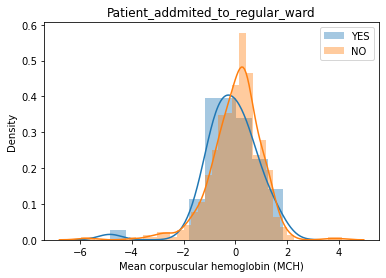

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


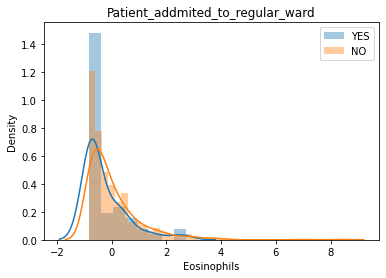

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


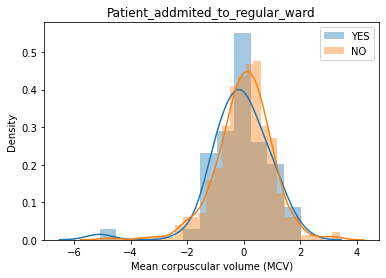

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


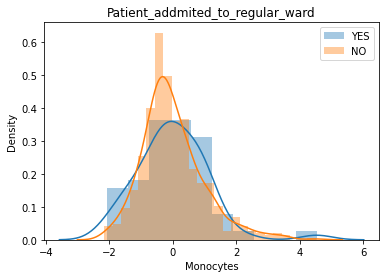

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


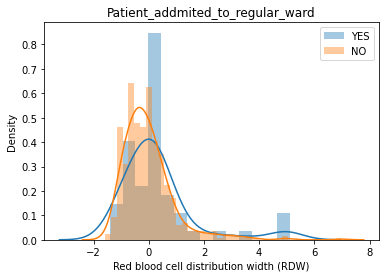

In [135]:
for col in blood_set :
    
    sns.distplot(df_Patient_addmited_to_regular_ward_YES[col], label = 'YES')
    sns.distplot(df_Patient_addmited_to_regular_ward_NO[col], label = 'NO')
    plt.legend()
    plt.title('Patient_addmited_to_regular_ward')
    plt.show()

In [143]:
df_Patient_addmited_to_semi_intensive_unit_YES = df_hos_blood[df_hos_blood['Patient addmited to semi-intensive unit'] == 'yes']
df_Patient_addmited_to_semi_intensive_unit_NO = df_hos_blood[df_hos_blood['Patient addmited to semi-intensive unit'] == 'no']    

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


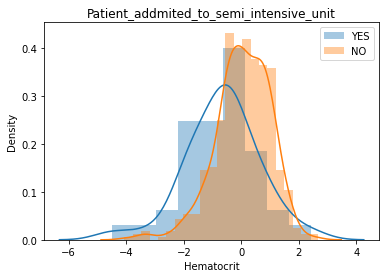

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


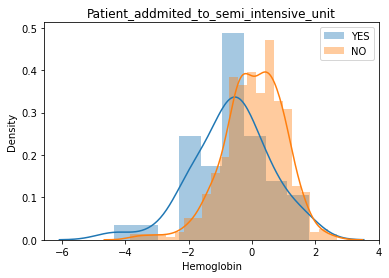

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


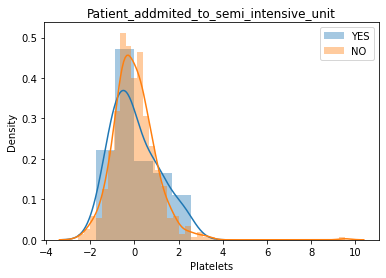

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


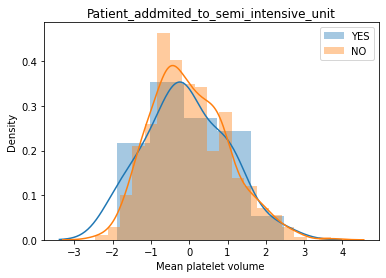

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


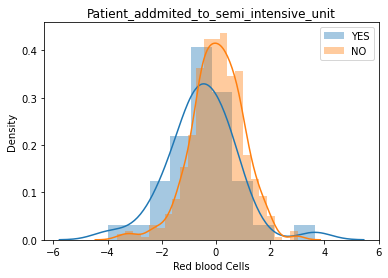

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


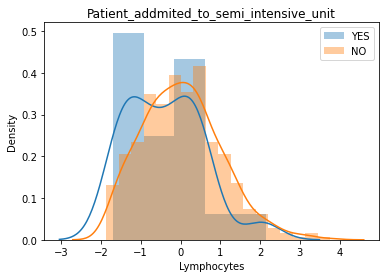

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


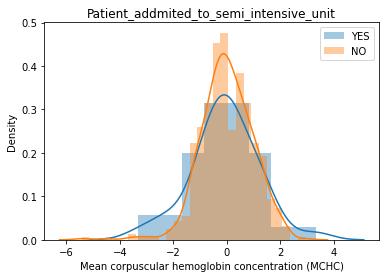

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


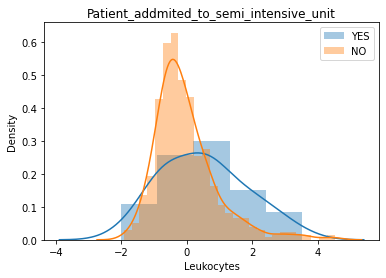

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


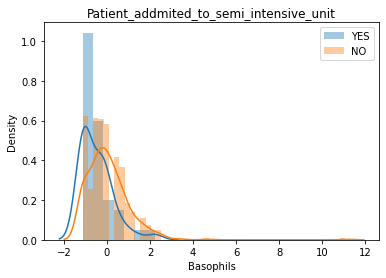

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


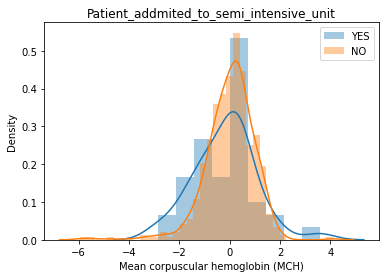

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


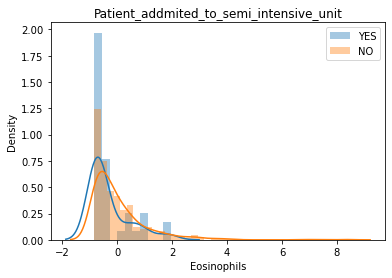

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


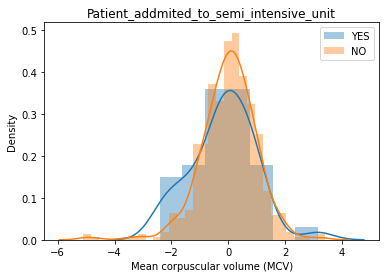

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


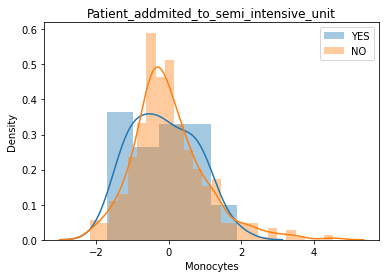

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


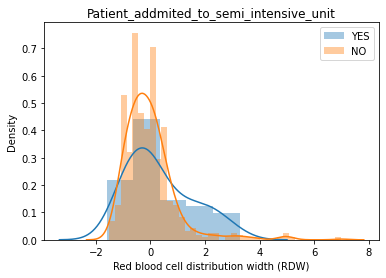

In [148]:
for col in blood_set :
    
    sns.distplot(df_Patient_addmited_to_semi_intensive_unit_YES[col], label = 'YES')
    sns.distplot(df_Patient_addmited_to_semi_intensive_unit_NO[col], label = 'NO')
    plt.legend()
    plt.title('Patient_addmited_to_semi_intensive_unit')
    plt.show()

In [150]:
df_Patient_addmited_to_intensive_care_unit_YES = df_hos_blood[df_hos_blood['Patient addmited to to intensive care unit '] == 'yes']
df_Patient_addmited_to_intensive_care_unit_NO = df_hos_blood[df_hos_blood['Patient addmited to to intensive care unit '] == 'no'] 

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


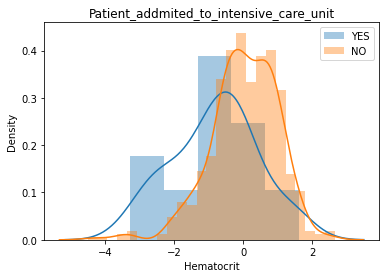

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


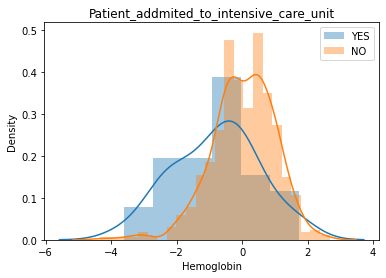

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


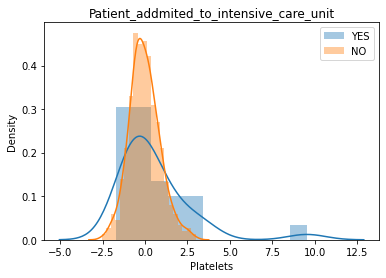

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


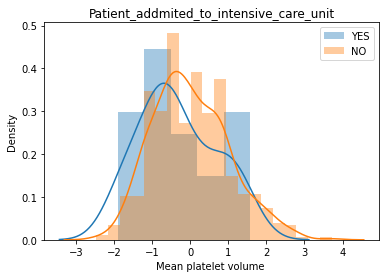

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


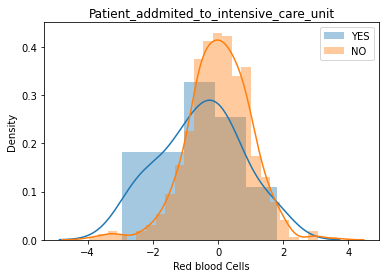

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


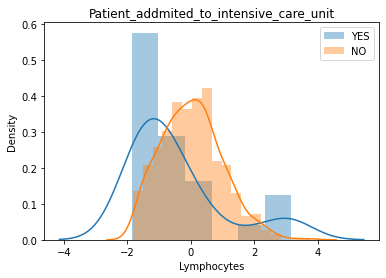

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


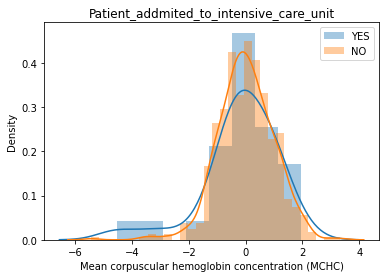

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


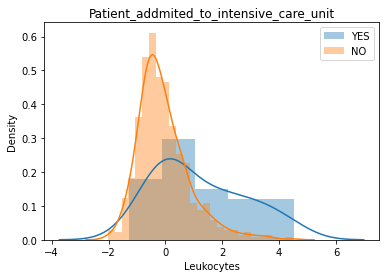

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


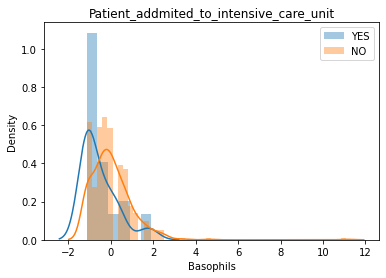

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


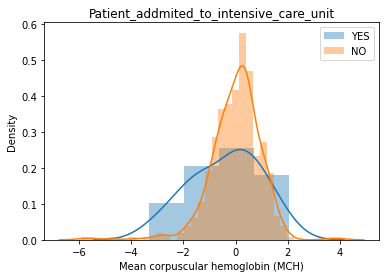

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


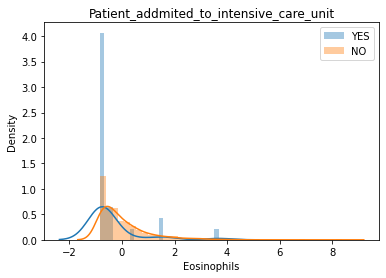

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


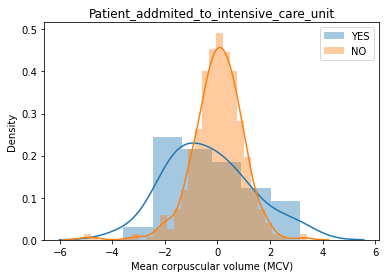

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


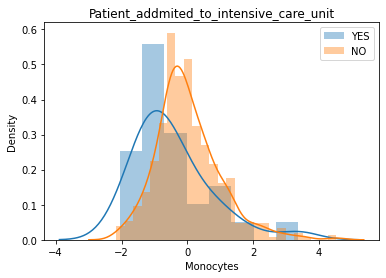

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


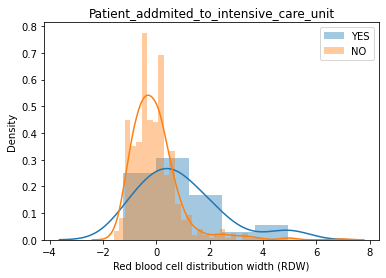

In [151]:
for col in blood_set :
    
    sns.distplot(df_Patient_addmited_to_intensive_care_unit_YES[col], label = 'YES')
    sns.distplot(df_Patient_addmited_to_intensive_care_unit_NO[col], label = 'NO')
    plt.legend()
    plt.title('Patient_addmited_to_intensive_care_unit')
    plt.show()

# 1.4 Test statitique de Student : µ1 (!= or =) µ2

In [152]:
from scipy.stats import ttest_ind

# 1.4.1 Premier test : Signification en termes des varables Blood/Covid

In [154]:
df_positive.shape

(558, 38)

In [157]:
df1 = df_positive.dropna()
df1.shape

(13, 38)

In [159]:
df2 = df_negative.dropna()
df2.shape

(86, 38)

In [215]:
def student_test(col):
    alpha = 0.02
    stat , p_value = ttest_ind(df_negative.dropna().sample(df_positive.dropna().shape[0] , random_state = 0)[col] , df_positive.dropna()[col])
    
    if p_value < alpha :
        return f'H0 is rejected : there is a signification between {col} and Covid '
    else :
        return 'H0 is accepted : can not considered as significant varaible with Covid'

In [216]:
for col in blood_set :
    print(col , '_______________' , student_test(col) )

Hematocrit _______________ H0 is accepted : can not considered as significant varaible with Covid
Hemoglobin _______________ H0 is accepted : can not considered as significant varaible with Covid
Platelets _______________ H0 is rejected : there is a signification between Platelets and Covid 
Mean platelet volume  _______________ H0 is accepted : can not considered as significant varaible with Covid
Red blood Cells _______________ H0 is accepted : can not considered as significant varaible with Covid
Lymphocytes _______________ H0 is accepted : can not considered as significant varaible with Covid
Mean corpuscular hemoglobin concentration (MCHC) _______________ H0 is accepted : can not considered as significant varaible with Covid
Leukocytes _______________ H0 is rejected : there is a signification between Leukocytes and Covid 
Basophils _______________ H0 is accepted : can not considered as significant varaible with Covid
Mean corpuscular hemoglobin (MCH) _______________ H0 is accepted

# 1.4.2 Deuxième test : Signification en termes des variables Hospitalité/Covid

In [203]:
df1 = df_Patient_addmited_to_regular_ward_YES
df2 = df_Patient_addmited_to_regular_ward_YES.dropna()
df1.shape , df2.shape

((79, 20), (57, 20))

In [204]:
df1 = df_Patient_addmited_to_regular_ward_NO
df2 = df_Patient_addmited_to_regular_ward_NO.dropna()
df1.shape , df2.shape

((5565, 20), (541, 20))

In [221]:
def student_test_t21(col):
    alpha = 0.02
    stat , p_value = ttest_ind(df_Patient_addmited_to_regular_ward_NO.dropna().sample(df_Patient_addmited_to_regular_ward_YES.dropna().shape[0] , random_state = 0)[col] , df_Patient_addmited_to_regular_ward_YES.dropna()[col])
    
    if p_value < alpha :
        return f'H0 is rejected : there is a signification between {col} and patient regular_ward '
    else :
        return 'H0 is accepted : can not considered as significant varaible patient regular_ward'

In [222]:
for col in blood_set :
    print(col , '_______________' , student_test_t21(col) )

Hematocrit _______________ H0 is accepted : can not considered as significant varaible patient regular_ward
Hemoglobin _______________ H0 is accepted : can not considered as significant varaible patient regular_ward
Platelets _______________ H0 is accepted : can not considered as significant varaible patient regular_ward
Mean platelet volume  _______________ H0 is accepted : can not considered as significant varaible patient regular_ward
Red blood Cells _______________ H0 is accepted : can not considered as significant varaible patient regular_ward
Lymphocytes _______________ H0 is accepted : can not considered as significant varaible patient regular_ward
Mean corpuscular hemoglobin concentration (MCHC) _______________ H0 is accepted : can not considered as significant varaible patient regular_ward
Leukocytes _______________ H0 is accepted : can not considered as significant varaible patient regular_ward
Basophils _______________ H0 is accepted : can not considered as significant varai

In [205]:
df1 = df_Patient_addmited_to_semi_intensive_unit_YES
df2 = df_Patient_addmited_to_semi_intensive_unit_YES.dropna()
df1.shape , df2.shape

((50, 20), (42, 20))

In [206]:
df1 = df_Patient_addmited_to_semi_intensive_unit_NO
df2 = df_Patient_addmited_to_semi_intensive_unit_NO.dropna()
df1.shape , df2.shape

((5594, 20), (556, 20))

In [227]:
def student_test_t22(col):
    alpha = 0.02
    stat , p_value = ttest_ind(df_Patient_addmited_to_semi_intensive_unit_NO.dropna().sample(df_Patient_addmited_to_semi_intensive_unit_YES.dropna().shape[0] , random_state = 0)[col] , df_Patient_addmited_to_semi_intensive_unit_YES.dropna()[col])
    
    if p_value < alpha :
        return f'H0 is rejected : there is a signification between {col} and patient intensive_unit '
    else :
        return 'H0 is accepted : can not considered as significant varaible patient intensive_unit'

In [228]:
for col in blood_set :
    print(col , '_______________' , student_test_t22(col) )

Hematocrit _______________ H0 is rejected : there is a signification between Hematocrit and patient intensive_unit 
Hemoglobin _______________ H0 is rejected : there is a signification between Hemoglobin and patient intensive_unit 
Platelets _______________ H0 is accepted : can not considered as significant varaible patient intensive_unit
Mean platelet volume  _______________ H0 is accepted : can not considered as significant varaible patient intensive_unit
Red blood Cells _______________ H0 is rejected : there is a signification between Red blood Cells and patient intensive_unit 
Lymphocytes _______________ H0 is rejected : there is a signification between Lymphocytes and patient intensive_unit 
Mean corpuscular hemoglobin concentration (MCHC) _______________ H0 is accepted : can not considered as significant varaible patient intensive_unit
Leukocytes _______________ H0 is rejected : there is a signification between Leukocytes and patient intensive_unit 
Basophils _______________ H0 i

In [225]:
df1 = df_Patient_addmited_to_intensive_care_unit_YES
df2 = df_Patient_addmited_to_intensive_care_unit_YES.dropna()
df1.shape , df2.shape

((41, 20), (29, 20))

In [226]:
df1 = df_Patient_addmited_to_intensive_care_unit_NO
df2 = df_Patient_addmited_to_intensive_care_unit_NO.dropna()
df1.shape , df2.shape

((5603, 20), (569, 20))

In [230]:
def student_test_t23(col):
    alpha = 0.02
    stat , p_value = ttest_ind(df_Patient_addmited_to_intensive_care_unit_NO.dropna().sample(df_Patient_addmited_to_intensive_care_unit_YES.dropna().shape[0] , random_state = 0)[col] , df_Patient_addmited_to_intensive_care_unit_YES.dropna()[col])
    
    if p_value < alpha :
        return f'H0 is rejected : there is a signification between {col} and patient intensive_care_unit '
    else :
        return 'H0 is accepted : can not considered as significant varaible patient intensive_care_unit'

In [231]:
for col in blood_set :
    print(col , '_______________' , student_test_t23(col) )

Hematocrit _______________ H0 is rejected : there is a signification between Hematocrit and patient intensive_care_unit 
Hemoglobin _______________ H0 is rejected : there is a signification between Hemoglobin and patient intensive_care_unit 
Platelets _______________ H0 is accepted : can not considered as significant varaible patient intensive_care_unit
Mean platelet volume  _______________ H0 is accepted : can not considered as significant varaible patient intensive_care_unit
Red blood Cells _______________ H0 is rejected : there is a signification between Red blood Cells and patient intensive_care_unit 
Lymphocytes _______________ H0 is accepted : can not considered as significant varaible patient intensive_care_unit
Mean corpuscular hemoglobin concentration (MCHC) _______________ H0 is accepted : can not considered as significant varaible patient intensive_care_unit
Leukocytes _______________ H0 is rejected : there is a signification between Leukocytes and patient intensive_care_uni

# 2 Machine Learning : Deviations between phases Phase 1 to Phase 2 and Phase 2 to Phase 1 (classical cycle : idea - code - evaluation)










# 2.1 Phase 1 :  de Pre-processing

In [396]:
df = data.copy()

In [397]:
Columns = list([target , 'Patient age quantile' , 'Patient addmited to regular ward (1=yes, 0=no)' , 'Patient addmited to semi-intensive unit (1=yes, 0=no)' , 'Patient addmited to intensive care unit (1=yes, 0=no)']) + list(blood_set) + list(viral_set[: -2])

In [398]:
df = df[Columns]

In [399]:
df

,SARS-Cov-2 exam result,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
Patient ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
44477f75e8169d2,negative,13,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126e9dd13932f68,negative,17,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected
a46b4402a0e5696,negative,8,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f7d619a94f97c45,negative,5,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d9e41465789c2b5,negative,15,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ae66feb9e4dc3a0,positive,3,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
517c2834024f3ea,negative,17,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5c57d6037fe266d,negative,4,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [400]:
from sklearn.model_selection import train_test_split

In [401]:
train , test = train_test_split(df, test_size = 0.2 , random_state = 0)

In [402]:
len(train) , len(test) , len(test)/len(train)

(4515, 1129, 0.25005537098560354)

In [403]:
train[target].value_counts()

negative    4068
positive     447
Name: SARS-Cov-2 exam result, dtype: int64

In [404]:
train[target].value_counts()[1]/train[target].value_counts()[0]

0.10988200589970501

In [405]:
test[target].value_counts()

negative    1018
positive     111
Name: SARS-Cov-2 exam result, dtype: int64

In [406]:
test[target].value_counts()[1]/test[target].value_counts()[0]

0.10903732809430255

In [407]:
for col in df.select_dtypes('O') : 
    print(col , '_________________________'  , df[col].unique() ) 

SARS-Cov-2 exam result _________________________ ['negative' 'positive']
Respiratory Syncytial Virus _________________________ [nan 'not_detected' 'detected']
Influenza A _________________________ [nan 'not_detected' 'detected']
Influenza B _________________________ [nan 'not_detected' 'detected']
Parainfluenza 1 _________________________ [nan 'not_detected' 'detected']
CoronavirusNL63 _________________________ [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus _________________________ [nan 'detected' 'not_detected']
Coronavirus HKU1 _________________________ [nan 'not_detected' 'detected']
Parainfluenza 3 _________________________ [nan 'not_detected' 'detected']
Chlamydophila pneumoniae _________________________ [nan 'not_detected' 'detected']
Adenovirus _________________________ [nan 'not_detected' 'detected']
Parainfluenza 4 _________________________ [nan 'not_detected' 'detected']
Coronavirus229E _________________________ [nan 'not_detected' 'detected']
CoronavirusOC43 _______

In [408]:
def encoding(df) : 
    dict_code = {'positive' : 1,
            'negative' : 0 ,
            'detected' : 1,
            'not_detected': 0}
    for col in df.select_dtypes('O'):
        df[col] = df[col].map(dict_code)
        
    return df

def cleaning(df):
    df = df.dropna()
    
    return df

def mean_col(df , col):
    means = df.mean()
    return col.fillna(means[col.name])

def imputation(df):
    df = df.apply(lambda col : mean_col(df , col) , axis = 0)
    return df
    
def pre_processing(df) :
    df = encoding(df)
    df = cleaning(df)
    #df = imputation(df)
    
    X = df.drop(target , axis = 1)
    y = df[target]
    
    return X,y 

In [409]:
X_train , y_train = pre_processing(train)
X_test , y_test = pre_processing(test)

In [410]:
y_train.value_counts()

0    258
1     38
Name: SARS-Cov-2 exam result, dtype: int64

In [411]:
y_test.value_counts()

0    54
1    12
Name: SARS-Cov-2 exam result, dtype: int64

# 2.2 Phase 2 : Model Evaluation 

In [460]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [461]:
rand_model = DTC(random_state = 0)

In [462]:
def evaluation(model) :
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv= 4, scoring = 'f1', train_sizes = np.linspace(0.1, 1, 10))
    print(N)
    
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1), label = 'train score')
    plt.plot(N, val_score.mean(axis=1), label = 'validation score')
    plt.legend()

[[47  7]
 [ 7  5]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        54
           1       0.42      0.42      0.42        12

    accuracy                           0.79        66
   macro avg       0.64      0.64      0.64        66
weighted avg       0.79      0.79      0.79        66

[ 22  44  66  88 111 133 155 177 199 222]


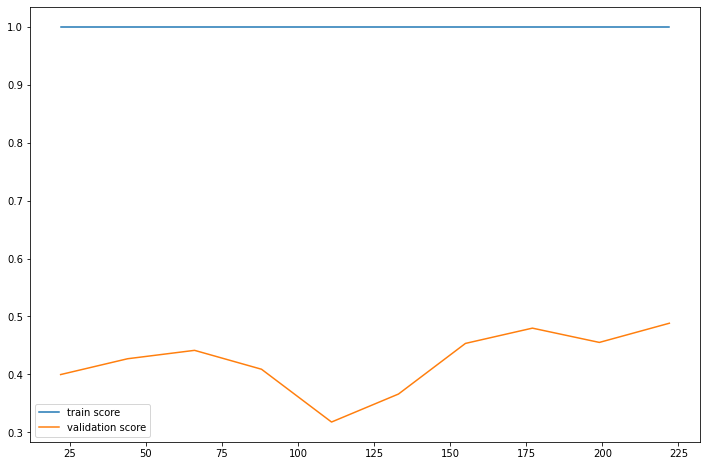

In [463]:
evaluation(rand_model)

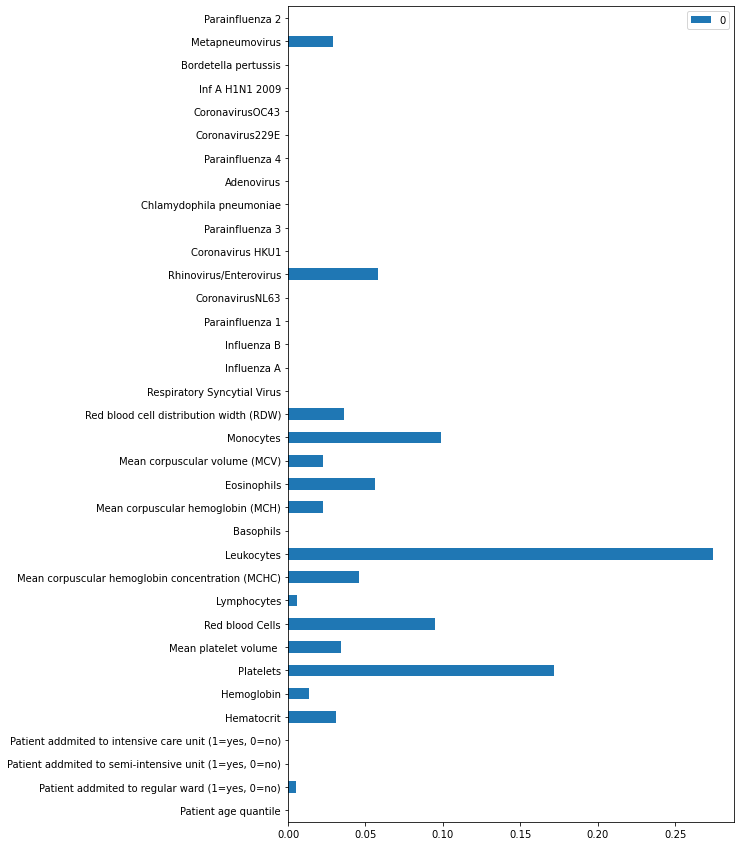

In [416]:
pd.DataFrame(data = rand_model.feature_importances_ , index = X_train.columns).plot.barh(figsize = (8,15))
plt.show()

In [417]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [418]:
model_RFC = RFC(random_state = 0)

[[54  0]
 [10  2]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.92        54
           1       1.00      0.17      0.29        12

    accuracy                           0.85        66
   macro avg       0.92      0.58      0.60        66
weighted avg       0.87      0.85      0.80        66

[ 22  44  66  88 111 133 155 177 199 222]


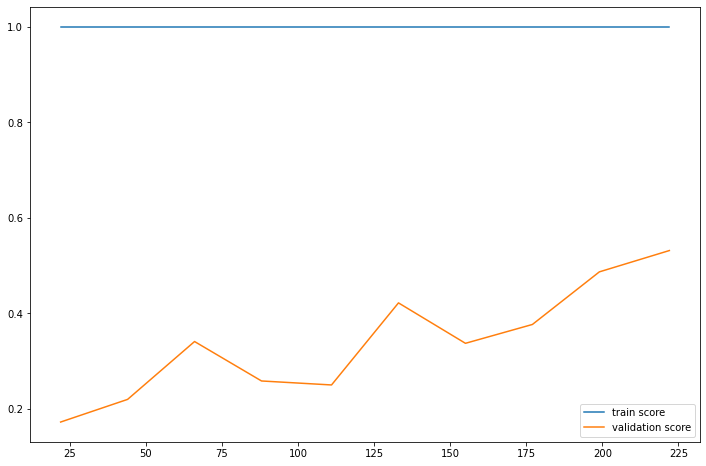

In [419]:
evaluation(model_RFC)

In [420]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest , f_classif 

In [429]:
model_ANOVA = make_pipeline(SelectKBest(f_classif, k= 10) , model_RFC)

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [21 26 32 34] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[[54  0]
 [ 8  4]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        54
           1       1.00      0.33      0.50        12

    accuracy                           0.88        66
   macro avg       0.94      0.67      0.72        66
weighted avg       0.89      0.88      0.85        66



C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 3 18 19 21 24 25 26 27 28 29 30 31 32 33 34] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [19 21 24 26 27 28 29 32 33 34] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [19 21 26 28 32 33 34] are constant.
  warnings

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [21 22 24 25 26 27 28 29 30 32 33 34] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [21 24 25 26 27 28 29 30 32 34] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [21 24 25 26 27 28 29 30 32 34] are constant.
  warnings

[ 22  44  66  88 111 133 155 177 199 222]


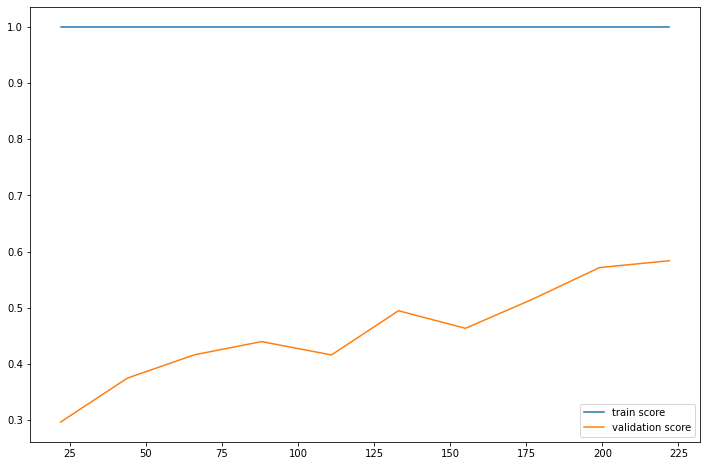

In [430]:
evaluation(model_ANOVA)

In [438]:
from sklearn.preprocessing import PolynomialFeatures , StandardScaler

In [432]:
model_ANOVA_interaction_2 = make_pipeline(PolynomialFeatures(2) , SelectKBest(f_classif, k= 10) , model_RFC)

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [  0  22  27  33  35  54  57  62  63  64  68  70  72  73  88  89  91  94
  96  97  98  99 100 102 104 106 122 124 129 130 131 132 133 135 136 137
 154 155 156 157 159 160 161 162 163 164 165 167 168 169 187 192 198 200
 217 222 228 230 246 251 257 259 274 279 285 287 301 306 312 314 327 332
 338 340 352 357 363 365 376 381 387 389 399 404 410 412 421 426 432 434
 442 447 453 455 462 467 473 475 481 486 492 494 499 504 510 512 514 515
 516 517 519 520 521 523 524 525 526 527 528 529 531 532 533 534 535 536
 537 538 540 541 543 544 545 547 548 550 551 552 553 554 555 556 558 560
 561 562 563 564 565 566 567 568 569 570 571 572 573 574 576 577 579 580
 581 582 583 584 585 586 587 589 590 591 593 594 596 597 598 599 601 602
 603 604 605 606 607 608 609 610 612 613 614 615 616 617 618 619 620 621
 622 623 624 625 626 627 628 629 631 632 633 634 635 636 637 639 640 641
 642 6

[[52  2]
 [ 9  3]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        54
           1       0.60      0.25      0.35        12

    accuracy                           0.83        66
   macro avg       0.73      0.61      0.63        66
weighted avg       0.81      0.83      0.80        66



C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [  0   4  19  20  22  25  26  27  28  29  30  31  32  33  34  35  39  54
  55  57  60  61  62  63  64  65  66  67  68  69  70  72  73  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 106 121 122 123
 124 125 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 184 185 187 190 191 192 193 194 195
 196 197 198 199 200 214 215 217 220 221 222 223 224 225 226 227 228 229
 230 243 244 246 249 250 251 252 253 254 255 256 257 258 259 271 272 274
 277 278 279 280 281 282 283 284 285 286 287 298 299 301 304 305 306 307
 308 309 310 311 312 313 314 324 325 327 330 331 332 333 334 335 336 337
 338 339 340 349 350 352 355 356 357 358 359 360 361 362 363 364 365 373
 374 376 379 380 381 382 383 384 385 386 387 388 389 396 397 399 402 403
 404 4

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [  0  22  27  33  35  54  55  57  62  63  64  68  70  72  73  88  89  91
  94  96  97  98  99 100 101 102 103 104 106 121 122 124 125 127 128 129
 130 131 132 133 135 136 137 154 155 156 157 159 160 161 162 163 164 165
 167 168 169 187 192 198 200 217 222 228 230 246 251 257 259 274 279 285
 287 301 306 312 314 327 332 338 340 352 357 363 365 376 381 387 389 399
 404 410 412 421 426 432 434 442 447 453 455 462 467 473 475 481 486 492
 494 499 504 510 512 514 515 516 517 519 520 521 523 524 525 526 527 528
 529 531 532 533 534 535 536 537 538 540 541 542 543 544 545 547 548 549
 550 551 552 553 554 555 556 557 558 559 560 561 562 563 564 565 566 567
 568 569 570 571 572 573 574 576 577 578 579 580 581 582 583 584 585 586
 587 589 590 591 593 594 596 597 598 599 601 602 603 604 605 606 607 608
 609 610 612 613 614 615 616 617 618 619 620 621 622 623 624 625 626 627
 628 6

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [  0  22  23  25  26  27  28  29  30  31  33  34  35  54  57  58  60  61
  62  63  64  65  66  68  69  70  72  73  88  89  90  91  92  94  95  96
  97  98  99 100 102 103 104 106 122 124 125 126 127 128 129 130 131 132
 133 134 135 136 137 153 154 155 156 157 159 160 161 162 163 164 165 166
 167 168 169 187 188 190 191 192 193 194 195 196 198 199 200 217 218 220
 221 222 223 224 225 226 228 229 230 246 247 249 250 251 252 253 254 255
 257 258 259 274 275 277 278 279 280 281 282 283 285 286 287 301 302 304
 305 306 307 308 309 310 312 313 314 327 328 330 331 332 333 334 335 336
 338 339 340 352 353 355 356 357 358 359 360 361 363 364 365 376 377 379
 380 381 382 383 384 385 387 388 389 399 400 402 403 404 405 406 407 408
 410 411 412 421 422 424 425 426 427 428 429 430 432 433 434 442 443 445
 446 447 448 449 450 451 453 454 455 462 463 465 466 467 468 469 470 471
 473 4

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [  0  22  27  28  31  33  35  54  57  62  63  64  66  68  70  72  73  88
  89  91  94  95  96  97  98  99 100 102 104 106 122 124 127 129 130 131
 132 133 135 136 137 154 155 156 157 159 160 161 162 163 164 165 166 167
 168 169 187 192 193 196 198 200 217 222 223 226 228 230 246 251 252 255
 257 259 274 279 280 283 285 287 301 306 307 310 312 314 327 332 333 336
 338 340 352 357 358 361 363 365 376 381 382 385 387 389 399 404 405 408
 410 412 421 426 427 430 432 434 442 447 448 451 453 455 462 467 468 471
 473 475 481 486 487 490 492 494 499 504 505 508 510 512 514 515 516 517
 518 519 520 521 522 523 524 525 526 527 528 529 531 532 533 534 535 536
 537 538 540 541 543 544 545 547 548 550 551 552 553 554 555 556 557 558
 559 560 561 562 563 564 565 566 567 568 569 570 571 572 573 574 576 577
 579 580 581 582 583 584 585 586 587 589 590 591 592 593 594 595 596 597
 598 5

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [  0  22  25  26  27  28  29  30  31  33  35  54  57  60  61  62  63  64
  65  66  68  70  72  73  88  89  90  91  92  94  95  96  97  98  99 100
 102 104 106 122 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 153 154 155 156 157 159 160 161 162 163 164 165 166 167 168 169 187 190
 191 192 193 194 195 196 198 200 217 220 221 222 223 224 225 226 228 230
 246 249 250 251 252 253 254 255 257 259 274 277 278 279 280 281 282 283
 285 287 301 304 305 306 307 308 309 310 312 314 327 330 331 332 333 334
 335 336 338 340 352 355 356 357 358 359 360 361 363 365 376 379 380 381
 382 383 384 385 387 389 399 402 403 404 405 406 407 408 410 412 421 424
 425 426 427 428 429 430 432 434 442 445 446 447 448 449 450 451 453 455
 462 465 466 467 468 469 470 471 473 475 481 484 485 486 487 488 489 490
 492 494 499 502 503 504 505 506 507 508 510 512 514 515 516 517 518 519
 520 5

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [  0  22  27  29  33  35  54  57  62  63  64  68  70  72  73  88  89  90
  91  92  94  96  97  98  99 100 102 104 106 122 124 127 129 130 131 132
 133 134 135 136 137 154 155 156 157 159 160 161 162 163 164 165 167 168
 169 187 192 194 198 200 217 222 224 228 230 246 251 253 257 259 274 279
 281 285 287 301 306 308 312 314 327 332 334 338 340 352 357 359 363 365
 376 381 383 387 389 399 404 406 410 412 421 426 428 432 434 442 447 449
 453 455 462 467 469 473 475 481 486 488 492 494 499 504 506 510 512 514
 515 516 517 519 520 521 523 524 525 526 527 528 529 531 532 533 534 535
 536 537 538 539 540 541 543 544 545 547 548 550 551 552 553 554 555 556
 558 559 560 561 562 563 564 565 566 567 568 569 570 571 572 573 574 576
 577 579 580 581 582 583 584 585 586 587 589 590 591 593 594 596 597 598
 599 601 602 603 604 605 606 607 608 609 610 612 613 614 615 616 617 618
 619 6

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [  0  22  25  26  27  28  29  30  31  33  35  54  57  60  61  62  63  64
  65  66  68  70  72  73  88  89  90  91  92  94  95  96  97  98  99 100
 102 104 106 122 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 153 154 155 156 157 159 160 161 162 163 164 165 166 167 168 169 187 190
 191 192 193 194 195 196 198 200 217 220 221 222 223 224 225 226 228 230
 246 249 250 251 252 253 254 255 257 259 274 277 278 279 280 281 282 283
 285 287 301 304 305 306 307 308 309 310 312 314 327 330 331 332 333 334
 335 336 338 340 352 355 356 357 358 359 360 361 363 365 376 379 380 381
 382 383 384 385 387 389 399 402 403 404 405 406 407 408 410 412 421 424
 425 426 427 428 429 430 432 434 442 445 446 447 448 449 450 451 453 455
 462 465 466 467 468 469 470 471 473 475 481 484 485 486 487 488 489 490
 492 494 499 502 503 504 505 506 507 508 510 512 514 515 516 517 518 519
 520 5

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [  0  22  27  29  33  35  54  57  62  63  64  68  70  72  73  88  89  91
  94  96  97  98  99 100 102 104 106 122 124 125 127 128 129 130 131 132
 133 135 136 137 154 155 156 157 159 160 161 162 163 164 165 167 168 169
 187 192 194 198 200 217 222 224 228 230 246 251 253 257 259 274 279 281
 285 287 301 306 308 312 314 327 332 334 338 340 352 357 359 363 365 376
 381 383 387 389 399 404 406 410 412 421 426 428 432 434 442 447 449 453
 455 462 467 469 473 475 481 486 488 492 494 499 504 506 510 512 514 515
 516 517 519 520 521 523 524 525 526 527 528 529 531 532 533 534 535 536
 537 538 539 540 541 543 544 545 547 548 549 550 551 552 553 554 555 556
 557 558 559 560 561 562 563 564 565 566 567 568 569 570 571 572 573 574
 576 577 578 579 580 581 582 583 584 585 586 587 589 590 591 593 594 596
 597 598 599 601 602 603 604 605 606 607 608 609 610 612 613 614 615 616
 617 6

[ 22  44  66  88 111 133 155 177 199 222]


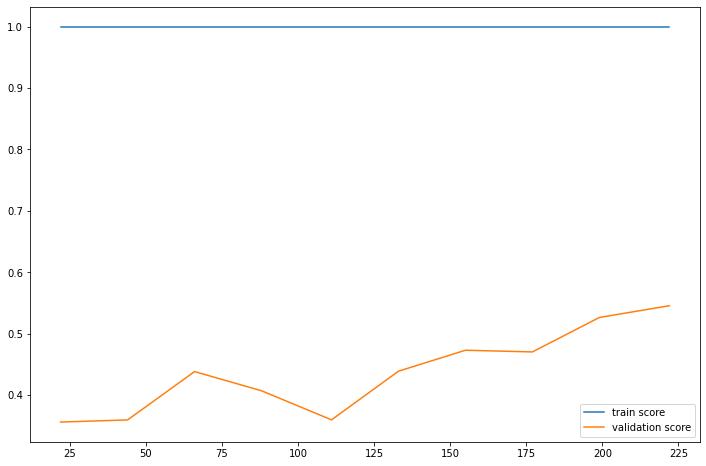

In [433]:
evaluation(model_ANOVA_interaction_2)

In [435]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier

In [441]:
state_pipline = make_pipeline(PolynomialFeatures(2 , include_bias = False) , SelectKBest(f_classif, k= 10))

In [446]:
RandomForest = make_pipeline(state_pipline , RandomForestClassifier(random_state = 0))
AdaBoost = make_pipeline(state_pipline , AdaBoostClassifier(random_state = 0))
SVM = make_pipeline(state_pipline , StandardScaler(), SVC(random_state = 0))
KNN = make_pipeline(state_pipline , StandardScaler(), KNeighborsClassifier())

In [447]:
models = [RandomForest, AdaBoost, SVM , KNN ]

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 21  26  32  34  53  56  61  62  63  67  69  71  72  87  88  90  93  95
  96  97  98  99 101 103 105 121 123 128 129 130 131 132 134 135 136 153
 154 155 156 158 159 160 161 162 163 164 166 167 168 186 191 197 199 216
 221 227 229 245 250 256 258 273 278 284 286 300 305 311 313 326 331 337
 339 351 356 362 364 375 380 386 388 398 403 409 411 420 425 431 433 441
 446 452 454 461 466 472 474 480 485 491 493 498 503 509 511 513 514 515
 516 518 519 520 522 523 524 525 526 527 528 530 531 532 533 534 535 536
 537 539 540 542 543 544 546 547 549 550 551 552 553 554 555 557 559 560
 561 562 563 564 565 566 567 568 569 570 571 572 573 575 576 578 579 580
 581 582 583 584 585 586 588 589 590 592 593 595 596 597 598 600 601 602
 603 604 605 606 607 608 609 611 612 613 614 615 616 617 618 619 620 621
 622 623 624 625 626 627 628 630 631 632 633 634 635 636 638 639 640 641
 642 6

[[52  2]
 [ 9  3]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        54
           1       0.60      0.25      0.35        12

    accuracy                           0.83        66
   macro avg       0.73      0.61      0.63        66
weighted avg       0.81      0.83      0.80        66



C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [  3  18  19  21  24  25  26  27  28  29  30  31  32  33  34  38  53  54
  56  59  60  61  62  63  64  65  66  67  68  69  71  72  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 105 120 121 122 123
 124 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 183 184 186 189 190 191 192 193 194 195
 196 197 198 199 213 214 216 219 220 221 222 223 224 225 226 227 228 229
 242 243 245 248 249 250 251 252 253 254 255 256 257 258 270 271 273 276
 277 278 279 280 281 282 283 284 285 286 297 298 300 303 304 305 306 307
 308 309 310 311 312 313 323 324 326 329 330 331 332 333 334 335 336 337
 338 339 348 349 351 354 355 356 357 358 359 360 361 362 363 364 372 373
 375 378 379 380 381 382 383 384 385 386 387 388 395 396 398 401 402 403
 404 4

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 21  26  32  34  53  54  56  61  62  63  67  69  71  72  87  88  90  93
  95  96  97  98  99 100 101 102 103 105 120 121 123 124 126 127 128 129
 130 131 132 134 135 136 153 154 155 156 158 159 160 161 162 163 164 166
 167 168 186 191 197 199 216 221 227 229 245 250 256 258 273 278 284 286
 300 305 311 313 326 331 337 339 351 356 362 364 375 380 386 388 398 403
 409 411 420 425 431 433 441 446 452 454 461 466 472 474 480 485 491 493
 498 503 509 511 513 514 515 516 518 519 520 522 523 524 525 526 527 528
 530 531 532 533 534 535 536 537 539 540 541 542 543 544 546 547 548 549
 550 551 552 553 554 555 556 557 558 559 560 561 562 563 564 565 566 567
 568 569 570 571 572 573 575 576 577 578 579 580 581 582 583 584 585 586
 588 589 590 592 593 595 596 597 598 600 601 602 603 604 605 606 607 608
 609 611 612 613 614 615 616 617 618 619 620 621 622 623 624 625 626 627
 628 6

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 21  22  24  25  26  27  28  29  30  32  33  34  53  56  57  59  60  61
  62  63  64  65  67  68  69  71  72  87  88  89  90  91  93  94  95  96
  97  98  99 101 102 103 105 121 123 124 125 126 127 128 129 130 131 132
 133 134 135 136 152 153 154 155 156 158 159 160 161 162 163 164 165 166
 167 168 186 187 189 190 191 192 193 194 195 197 198 199 216 217 219 220
 221 222 223 224 225 227 228 229 245 246 248 249 250 251 252 253 254 256
 257 258 273 274 276 277 278 279 280 281 282 284 285 286 300 301 303 304
 305 306 307 308 309 311 312 313 326 327 329 330 331 332 333 334 335 337
 338 339 351 352 354 355 356 357 358 359 360 362 363 364 375 376 378 379
 380 381 382 383 384 386 387 388 398 399 401 402 403 404 405 406 407 409
 410 411 420 421 423 424 425 426 427 428 429 431 432 433 441 442 444 445
 446 447 448 449 450 452 453 454 461 462 464 465 466 467 468 469 470 472
 473 4

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 21  26  27  30  32  34  53  56  61  62  63  65  67  69  71  72  87  88
  90  93  94  95  96  97  98  99 101 103 105 121 123 126 128 129 130 131
 132 134 135 136 153 154 155 156 158 159 160 161 162 163 164 165 166 167
 168 186 191 192 195 197 199 216 221 222 225 227 229 245 250 251 254 256
 258 273 278 279 282 284 286 300 305 306 309 311 313 326 331 332 335 337
 339 351 356 357 360 362 364 375 380 381 384 386 388 398 403 404 407 409
 411 420 425 426 429 431 433 441 446 447 450 452 454 461 466 467 470 472
 474 480 485 486 489 491 493 498 503 504 507 509 511 513 514 515 516 517
 518 519 520 521 522 523 524 525 526 527 528 530 531 532 533 534 535 536
 537 539 540 542 543 544 546 547 549 550 551 552 553 554 555 556 557 558
 559 560 561 562 563 564 565 566 567 568 569 570 571 572 573 575 576 578
 579 580 581 582 583 584 585 586 588 589 590 591 592 593 594 595 596 597
 598 6

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 21  24  25  26  27  28  29  30  32  34  53  56  59  60  61  62  63  64
  65  67  69  71  72  87  88  89  90  91  93  94  95  96  97  98  99 101
 103 105 121 123 124 125 126 127 128 129 130 131 132 133 134 135 136 152
 153 154 155 156 158 159 160 161 162 163 164 165 166 167 168 186 189 190
 191 192 193 194 195 197 199 216 219 220 221 222 223 224 225 227 229 245
 248 249 250 251 252 253 254 256 258 273 276 277 278 279 280 281 282 284
 286 300 303 304 305 306 307 308 309 311 313 326 329 330 331 332 333 334
 335 337 339 351 354 355 356 357 358 359 360 362 364 375 378 379 380 381
 382 383 384 386 388 398 401 402 403 404 405 406 407 409 411 420 423 424
 425 426 427 428 429 431 433 441 444 445 446 447 448 449 450 452 454 461
 464 465 466 467 468 469 470 472 474 480 483 484 485 486 487 488 489 491
 493 498 501 502 503 504 505 506 507 509 511 513 514 515 516 517 518 519
 520 5

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 21  26  28  32  34  53  56  61  62  63  67  69  71  72  87  88  89  90
  91  93  95  96  97  98  99 101 103 105 121 123 126 128 129 130 131 132
 133 134 135 136 153 154 155 156 158 159 160 161 162 163 164 166 167 168
 186 191 193 197 199 216 221 223 227 229 245 250 252 256 258 273 278 280
 284 286 300 305 307 311 313 326 331 333 337 339 351 356 358 362 364 375
 380 382 386 388 398 403 405 409 411 420 425 427 431 433 441 446 448 452
 454 461 466 468 472 474 480 485 487 491 493 498 503 505 509 511 513 514
 515 516 518 519 520 522 523 524 525 526 527 528 530 531 532 533 534 535
 536 537 538 539 540 542 543 544 546 547 549 550 551 552 553 554 555 557
 558 559 560 561 562 563 564 565 566 567 568 569 570 571 572 573 575 576
 578 579 580 581 582 583 584 585 586 588 589 590 592 593 595 596 597 598
 600 601 602 603 604 605 606 607 608 609 611 612 613 614 615 616 617 618
 619 6

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 21  24  25  26  27  28  29  30  32  34  53  56  59  60  61  62  63  64
  65  67  69  71  72  87  88  89  90  91  93  94  95  96  97  98  99 101
 103 105 121 123 124 125 126 127 128 129 130 131 132 133 134 135 136 152
 153 154 155 156 158 159 160 161 162 163 164 165 166 167 168 186 189 190
 191 192 193 194 195 197 199 216 219 220 221 222 223 224 225 227 229 245
 248 249 250 251 252 253 254 256 258 273 276 277 278 279 280 281 282 284
 286 300 303 304 305 306 307 308 309 311 313 326 329 330 331 332 333 334
 335 337 339 351 354 355 356 357 358 359 360 362 364 375 378 379 380 381
 382 383 384 386 388 398 401 402 403 404 405 406 407 409 411 420 423 424
 425 426 427 428 429 431 433 441 444 445 446 447 448 449 450 452 454 461
 464 465 466 467 468 469 470 472 474 480 483 484 485 486 487 488 489 491
 493 498 501 502 503 504 505 506 507 509 511 513 514 515 516 517 518 519
 520 5

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 21  26  28  32  34  53  56  61  62  63  67  69  71  72  87  88  90  93
  95  96  97  98  99 101 103 105 121 123 124 126 127 128 129 130 131 132
 134 135 136 153 154 155 156 158 159 160 161 162 163 164 166 167 168 186
 191 193 197 199 216 221 223 227 229 245 250 252 256 258 273 278 280 284
 286 300 305 307 311 313 326 331 333 337 339 351 356 358 362 364 375 380
 382 386 388 398 403 405 409 411 420 425 427 431 433 441 446 448 452 454
 461 466 468 472 474 480 485 487 491 493 498 503 505 509 511 513 514 515
 516 518 519 520 522 523 524 525 526 527 528 530 531 532 533 534 535 536
 537 538 539 540 542 543 544 546 547 548 549 550 551 552 553 554 555 556
 557 558 559 560 561 562 563 564 565 566 567 568 569 570 571 572 573 575
 576 577 578 579 580 581 582 583 584 585 586 588 589 590 592 593 595 596
 597 598 600 601 602 603 604 605 606 607 608 609 611 612 613 614 615 616
 617 6

[ 22  44  66  88 111 133 155 177 199 222]


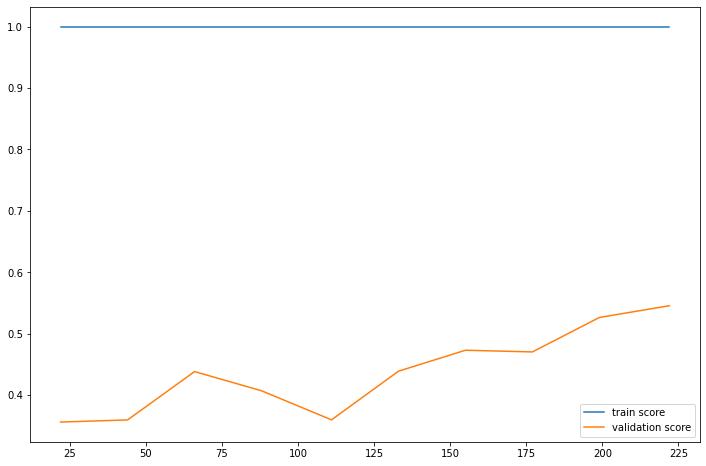

In [470]:
evaluation(models[0])

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 21  26  32  34  53  56  61  62  63  67  69  71  72  87  88  90  93  95
  96  97  98  99 101 103 105 121 123 128 129 130 131 132 134 135 136 153
 154 155 156 158 159 160 161 162 163 164 166 167 168 186 191 197 199 216
 221 227 229 245 250 256 258 273 278 284 286 300 305 311 313 326 331 337
 339 351 356 362 364 375 380 386 388 398 403 409 411 420 425 431 433 441
 446 452 454 461 466 472 474 480 485 491 493 498 503 509 511 513 514 515
 516 518 519 520 522 523 524 525 526 527 528 530 531 532 533 534 535 536
 537 539 540 542 543 544 546 547 549 550 551 552 553 554 555 557 559 560
 561 562 563 564 565 566 567 568 569 570 571 572 573 575 576 578 579 580
 581 582 583 584 585 586 588 589 590 592 593 595 596 597 598 600 601 602
 603 604 605 606 607 608 609 611 612 613 614 615 616 617 618 619 620 621
 622 623 624 625 626 627 628 630 631 632 633 634 635 636 638 639 640 641
 642 6

[[49  5]
 [ 8  4]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88        54
           1       0.44      0.33      0.38        12

    accuracy                           0.80        66
   macro avg       0.65      0.62      0.63        66
weighted avg       0.78      0.80      0.79        66



C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [  3  18  19  21  24  25  26  27  28  29  30  31  32  33  34  38  53  54
  56  59  60  61  62  63  64  65  66  67  68  69  71  72  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 105 120 121 122 123
 124 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 183 184 186 189 190 191 192 193 194 195
 196 197 198 199 213 214 216 219 220 221 222 223 224 225 226 227 228 229
 242 243 245 248 249 250 251 252 253 254 255 256 257 258 270 271 273 276
 277 278 279 280 281 282 283 284 285 286 297 298 300 303 304 305 306 307
 308 309 310 311 312 313 323 324 326 329 330 331 332 333 334 335 336 337
 338 339 348 349 351 354 355 356 357 358 359 360 361 362 363 364 372 373
 375 378 379 380 381 382 383 384 385 386 387 388 395 396 398 401 402 403
 404 4

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 21  26  32  34  53  54  56  61  62  63  67  69  71  72  87  88  90  93
  95  96  97  98  99 100 101 102 103 105 120 121 123 124 126 127 128 129
 130 131 132 134 135 136 153 154 155 156 158 159 160 161 162 163 164 166
 167 168 186 191 197 199 216 221 227 229 245 250 256 258 273 278 284 286
 300 305 311 313 326 331 337 339 351 356 362 364 375 380 386 388 398 403
 409 411 420 425 431 433 441 446 452 454 461 466 472 474 480 485 491 493
 498 503 509 511 513 514 515 516 518 519 520 522 523 524 525 526 527 528
 530 531 532 533 534 535 536 537 539 540 541 542 543 544 546 547 548 549
 550 551 552 553 554 555 556 557 558 559 560 561 562 563 564 565 566 567
 568 569 570 571 572 573 575 576 577 578 579 580 581 582 583 584 585 586
 588 589 590 592 593 595 596 597 598 600 601 602 603 604 605 606 607 608
 609 611 612 613 614 615 616 617 618 619 620 621 622 623 624 625 626 627
 628 6

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 21  22  24  25  26  27  28  29  30  32  33  34  53  56  57  59  60  61
  62  63  64  65  67  68  69  71  72  87  88  89  90  91  93  94  95  96
  97  98  99 101 102 103 105 121 123 124 125 126 127 128 129 130 131 132
 133 134 135 136 152 153 154 155 156 158 159 160 161 162 163 164 165 166
 167 168 186 187 189 190 191 192 193 194 195 197 198 199 216 217 219 220
 221 222 223 224 225 227 228 229 245 246 248 249 250 251 252 253 254 256
 257 258 273 274 276 277 278 279 280 281 282 284 285 286 300 301 303 304
 305 306 307 308 309 311 312 313 326 327 329 330 331 332 333 334 335 337
 338 339 351 352 354 355 356 357 358 359 360 362 363 364 375 376 378 379
 380 381 382 383 384 386 387 388 398 399 401 402 403 404 405 406 407 409
 410 411 420 421 423 424 425 426 427 428 429 431 432 433 441 442 444 445
 446 447 448 449 450 452 453 454 461 462 464 465 466 467 468 469 470 472
 473 4

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 21  26  27  30  32  34  53  56  61  62  63  65  67  69  71  72  87  88
  90  93  94  95  96  97  98  99 101 103 105 121 123 126 128 129 130 131
 132 134 135 136 153 154 155 156 158 159 160 161 162 163 164 165 166 167
 168 186 191 192 195 197 199 216 221 222 225 227 229 245 250 251 254 256
 258 273 278 279 282 284 286 300 305 306 309 311 313 326 331 332 335 337
 339 351 356 357 360 362 364 375 380 381 384 386 388 398 403 404 407 409
 411 420 425 426 429 431 433 441 446 447 450 452 454 461 466 467 470 472
 474 480 485 486 489 491 493 498 503 504 507 509 511 513 514 515 516 517
 518 519 520 521 522 523 524 525 526 527 528 530 531 532 533 534 535 536
 537 539 540 542 543 544 546 547 549 550 551 552 553 554 555 556 557 558
 559 560 561 562 563 564 565 566 567 568 569 570 571 572 573 575 576 578
 579 580 581 582 583 584 585 586 588 589 590 591 592 593 594 595 596 597
 598 6

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 21  24  25  26  27  28  29  30  32  34  53  56  59  60  61  62  63  64
  65  67  69  71  72  87  88  89  90  91  93  94  95  96  97  98  99 101
 103 105 121 123 124 125 126 127 128 129 130 131 132 133 134 135 136 152
 153 154 155 156 158 159 160 161 162 163 164 165 166 167 168 186 189 190
 191 192 193 194 195 197 199 216 219 220 221 222 223 224 225 227 229 245
 248 249 250 251 252 253 254 256 258 273 276 277 278 279 280 281 282 284
 286 300 303 304 305 306 307 308 309 311 313 326 329 330 331 332 333 334
 335 337 339 351 354 355 356 357 358 359 360 362 364 375 378 379 380 381
 382 383 384 386 388 398 401 402 403 404 405 406 407 409 411 420 423 424
 425 426 427 428 429 431 433 441 444 445 446 447 448 449 450 452 454 461
 464 465 466 467 468 469 470 472 474 480 483 484 485 486 487 488 489 491
 493 498 501 502 503 504 505 506 507 509 511 513 514 515 516 517 518 519
 520 5

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 21  26  28  32  34  53  56  61  62  63  67  69  71  72  87  88  89  90
  91  93  95  96  97  98  99 101 103 105 121 123 126 128 129 130 131 132
 133 134 135 136 153 154 155 156 158 159 160 161 162 163 164 166 167 168
 186 191 193 197 199 216 221 223 227 229 245 250 252 256 258 273 278 280
 284 286 300 305 307 311 313 326 331 333 337 339 351 356 358 362 364 375
 380 382 386 388 398 403 405 409 411 420 425 427 431 433 441 446 448 452
 454 461 466 468 472 474 480 485 487 491 493 498 503 505 509 511 513 514
 515 516 518 519 520 522 523 524 525 526 527 528 530 531 532 533 534 535
 536 537 538 539 540 542 543 544 546 547 549 550 551 552 553 554 555 557
 558 559 560 561 562 563 564 565 566 567 568 569 570 571 572 573 575 576
 578 579 580 581 582 583 584 585 586 588 589 590 592 593 595 596 597 598
 600 601 602 603 604 605 606 607 608 609 611 612 613 614 615 616 617 618
 619 6

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 21  24  25  26  27  28  29  30  32  34  53  56  59  60  61  62  63  64
  65  67  69  71  72  87  88  89  90  91  93  94  95  96  97  98  99 101
 103 105 121 123 124 125 126 127 128 129 130 131 132 133 134 135 136 152
 153 154 155 156 158 159 160 161 162 163 164 165 166 167 168 186 189 190
 191 192 193 194 195 197 199 216 219 220 221 222 223 224 225 227 229 245
 248 249 250 251 252 253 254 256 258 273 276 277 278 279 280 281 282 284
 286 300 303 304 305 306 307 308 309 311 313 326 329 330 331 332 333 334
 335 337 339 351 354 355 356 357 358 359 360 362 364 375 378 379 380 381
 382 383 384 386 388 398 401 402 403 404 405 406 407 409 411 420 423 424
 425 426 427 428 429 431 433 441 444 445 446 447 448 449 450 452 454 461
 464 465 466 467 468 469 470 472 474 480 483 484 485 486 487 488 489 491
 493 498 501 502 503 504 505 506 507 509 511 513 514 515 516 517 518 519
 520 5

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 21  26  28  32  34  53  56  61  62  63  67  69  71  72  87  88  90  93
  95  96  97  98  99 101 103 105 121 123 124 126 127 128 129 130 131 132
 134 135 136 153 154 155 156 158 159 160 161 162 163 164 166 167 168 186
 191 193 197 199 216 221 223 227 229 245 250 252 256 258 273 278 280 284
 286 300 305 307 311 313 326 331 333 337 339 351 356 358 362 364 375 380
 382 386 388 398 403 405 409 411 420 425 427 431 433 441 446 448 452 454
 461 466 468 472 474 480 485 487 491 493 498 503 505 509 511 513 514 515
 516 518 519 520 522 523 524 525 526 527 528 530 531 532 533 534 535 536
 537 538 539 540 542 543 544 546 547 548 549 550 551 552 553 554 555 556
 557 558 559 560 561 562 563 564 565 566 567 568 569 570 571 572 573 575
 576 577 578 579 580 581 582 583 584 585 586 588 589 590 592 593 595 596
 597 598 600 601 602 603 604 605 606 607 608 609 611 612 613 614 615 616
 617 6

[ 22  44  66  88 111 133 155 177 199 222]


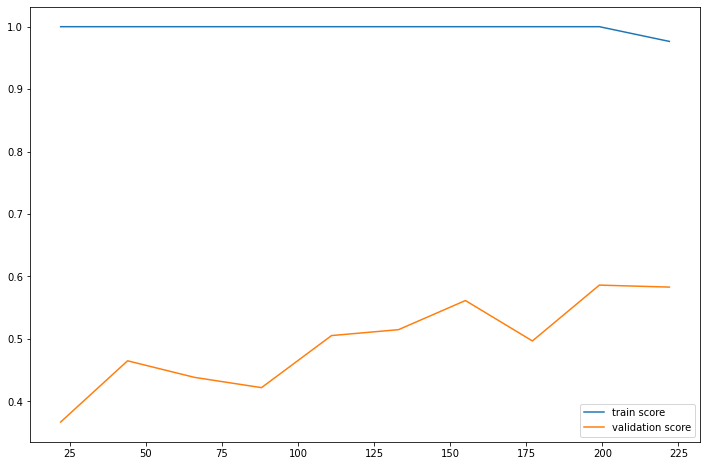

In [471]:
evaluation(models[1])

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 21  26  32  34  53  56  61  62  63  67  69  71  72  87  88  90  93  95
  96  97  98  99 101 103 105 121 123 128 129 130 131 132 134 135 136 153
 154 155 156 158 159 160 161 162 163 164 166 167 168 186 191 197 199 216
 221 227 229 245 250 256 258 273 278 284 286 300 305 311 313 326 331 337
 339 351 356 362 364 375 380 386 388 398 403 409 411 420 425 431 433 441
 446 452 454 461 466 472 474 480 485 491 493 498 503 509 511 513 514 515
 516 518 519 520 522 523 524 525 526 527 528 530 531 532 533 534 535 536
 537 539 540 542 543 544 546 547 549 550 551 552 553 554 555 557 559 560
 561 562 563 564 565 566 567 568 569 570 571 572 573 575 576 578 579 580
 581 582 583 584 585 586 588 589 590 592 593 595 596 597 598 600 601 602
 603 604 605 606 607 608 609 611 612 613 614 615 616 617 618 619 620 621
 622 623 624 625 626 627 628 630 631 632 633 634 635 636 638 639 640 641
 642 6

[[54  0]
 [ 9  3]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        54
           1       1.00      0.25      0.40        12

    accuracy                           0.86        66
   macro avg       0.93      0.62      0.66        66
weighted avg       0.88      0.86      0.83        66



C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 19  21  24  26  27  28  29  32  33  34  53  54  56  59  61  62  63  64
  67  68  69  71  72  87  88  89  90  91  93  95  96  97  98  99 100 101
 102 103 105 120 121 122 123 124 126 127 128 129 130 131 132 133 134 135
 136 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 184
 186 189 191 192 193 194 197 198 199 214 216 219 221 222 223 224 227 228
 229 243 245 248 250 251 252 253 256 257 258 271 273 276 278 279 280 281
 284 285 286 298 300 303 305 306 307 308 311 312 313 324 326 329 331 332
 333 334 337 338 339 349 351 354 356 357 358 359 362 363 364 373 375 378
 380 381 382 383 386 387 388 396 398 401 403 404 405 406 409 410 411 418
 420 423 425 426 427 428 431 432 433 439 441 444 446 447 448 449 452 453
 454 459 461 464 466 467 468 469 472 473 474 478 480 483 485 486 487 488
 491 492 493 496 498 501 503 504 505 506 509 510 511 513 514 515 516 517
 518 5

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 21  26  32  34  53  56  61  62  63  67  69  71  72  87  88  90  93  95
  96  97  98  99 100 101 102 103 105 121 123 128 129 130 131 132 134 135
 136 153 154 155 156 158 159 160 161 162 163 164 166 167 168 186 191 197
 199 216 221 227 229 245 250 256 258 273 278 284 286 300 305 311 313 326
 331 337 339 351 356 362 364 375 380 386 388 398 403 409 411 420 425 431
 433 441 446 452 454 461 466 472 474 480 485 491 493 498 503 509 511 513
 514 515 516 518 519 520 522 523 524 525 526 527 528 530 531 532 533 534
 535 536 537 539 540 541 542 543 544 546 547 549 550 551 552 553 554 555
 557 559 560 561 562 563 564 565 566 567 568 569 570 571 572 573 575 576
 578 579 580 581 582 583 584 585 586 588 589 590 592 593 595 

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 21  26  27  28  29  30  32  34  53  56  61  62  63  64  65  67  69  71
  72  87  88  90  93  94  95  96  97  98  99 101 103 105 121 123 124 125
 126 127 128 129 130 131 132 134 135 136 152 153 154 155 156 158 159 160
 161 162 163 164 165 166 167 168 186 191 192 193 194 195 197 199 216 221
 222 223 224 225 227 229 245 250 251 252 253 254 256 258 273 278 279 280
 281 282 284 286 300 305 306 307 308 309 311 313 326 331 332 333 334 335
 337 339 351 356 357 358 359 360 362 364 375 380 381 382 383 384 386 388
 398 403 404 405 406 407 409 411 420 425 426 427 428 429 431 433 441 446
 447 448 449 450 452 454 461 466 467 468 469 470 472 474 480 485 486 487
 488 489 491 493 498 503 504 505 506 507 509 511 513 514 515 516 517 518
 519 520 521 522 523 524 525 526 527 528 530 531 532 533 534 535 536 537
 538 539 540 542 543 544 546 547 548 549 550 551 552 553 554 555 556 557
 558 5

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [  3  21  22  24  25  26  27  28  29  30  32  33  34  38  53  56  57  59
  60  61  62  63  64  65  67  68  69  71  72  87  88  89  90  91  92  93
  94  95  96  97  98  99 101 102 103 105 121 123 124 125 126 127 128 129
 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147
 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165
 166 167 168 186 187 189 190 191 192 193 194 195 197 198 199 216 217 219
 220 221 222 223 224 225 227 228 229 245 246 248 249 250 251 252 253 254
 256 257 258 273 274 276 277 278 279 280 281 282 284 285 286 300 301 303
 304 305 306 307 308 309 311 312 313 326 327 329 330 331 332 333 334 335
 337 338 339 351 352 354 355 356 357 358 359 360 362 363 364 375 376 378
 379 380 381 382 383 384 386 387 388 398 399 401 402 403 404 405 406 407
 409 410 411 420 421 423 424 425 426 427 428 429 431 432 433 441 442 444
 445 4

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 21  26  28  32  34  53  56  61  62  63  67  69  71  72  87  88  89  90
  91  93  95  96  97  98  99 101 103 105 121 123 126 128 129 130 131 132
 133 134 135 136 153 154 155 156 158 159 160 161 162 163 164 166 167 168
 186 191 193 197 199 216 221 223 227 229 245 250 252 256 258 273 278 280
 284 286 300 305 307 311 313 326 331 333 337 339 351 356 358 362 364 375
 380 382 386 388 398 403 405 409 411 420 425 427 431 433 441 446 448 452
 454 461 466 468 472 474 480 485 487 491 493 498 503 505 509 511 513 514
 515 516 518 519 520 522 523 524 525 526 527 528 530 531 532 533 534 535
 536 537 538 539 540 542 543 544 546 547 549 550 551 552 553 554 555 556
 557 558 559 560 561 562 563 564 565 566 567 568 569 570 571 572 573 575
 576 578 579 580 581 582 583 584 585 586 588 589 590 592 593 595 596 597
 598 600 601 602 603 604 605 606 607 608 609 611 612 613 614 615 616 617
 618 6

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 21  24  25  26  27  28  29  30  32  34  53  56  59  60  61  62  63  64
  65  67  69  71  72  87  88  89  90  91  93  94  95  96  97  98  99 101
 103 105 121 123 124 125 126 127 128 129 130 131 132 133 134 135 136 152
 153 154 155 156 158 159 160 161 162 163 164 165 166 167 168 186 189 190
 191 192 193 194 195 197 199 216 219 220 221 222 223 224 225 227 229 245
 248 249 250 251 252 253 254 256 258 273 276 277 278 279 280 281 282 284
 286 300 303 304 305 306 307 308 309 311 313 326 329 330 331 332 333 334
 335 337 339 351 354 355 356 357 358 359 360 362 364 375 378 379 380 381
 382 383 384 386 388 398 401 402 403 404 405 406 407 409 411 420 423 424
 425 426 427 428 429 431 433 441 444 445 446 447 448 449 450 452 454 461
 464 465 466 467 468 469 470 472 474 480 483 484 485 486 487 488 489 491
 493 498 501 502 503 504 505 506 507 509 511 513 514 515 516 517 518 519
 520 5

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 21  26  28  32  34  53  56  61  62  63  67  69  71  72  87  88  90  93
  95  96  97  98  99 101 103 105 121 123 124 126 127 128 129 130 131 132
 134 135 136 153 154 155 156 158 159 160 161 162 163 164 166 167 168 186
 191 193 197 199 216 221 223 227 229 245 250 252 256 258 273 278 280 284
 286 300 305 307 311 313 326 331 333 337 339 351 356 358 362 364 375 380
 382 386 388 398 403 405 409 411 420 425 427 431 433 441 446 448 452 454
 461 466 468 472 474 480 485 487 491 493 498 503 505 509 511 513 514 515
 516 518 519 520 522 523 524 525 526 527 528 530 531 532 533 534 535 536
 537 538 539 540 542 543 544 546 547 548 549 550 551 552 553 554 555 556
 557 558 559 560 561 562 563 564 565 566 567 568 569 570 571 572 573 575
 576 577 578 579 580 581 582 583 584 585 586 588 589 590 592 593 595 596
 597 598 600 601 602 603 604 605 606 607 608 609 611 612 613 614 615 616
 617 6

[ 22  44  66  88 111 133 155 177 199 222]


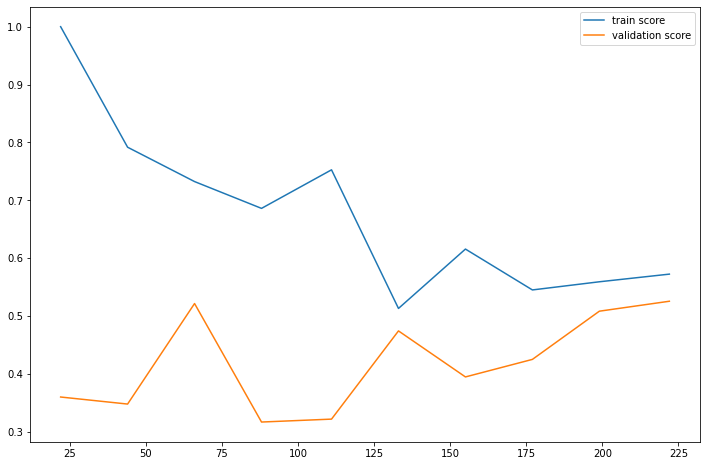

In [472]:
evaluation(models[2])

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 21  26  32  34  53  56  61  62  63  67  69  71  72  87  88  90  93  95
  96  97  98  99 101 103 105 121 123 128 129 130 131 132 134 135 136 153
 154 155 156 158 159 160 161 162 163 164 166 167 168 186 191 197 199 216
 221 227 229 245 250 256 258 273 278 284 286 300 305 311 313 326 331 337
 339 351 356 362 364 375 380 386 388 398 403 409 411 420 425 431 433 441
 446 452 454 461 466 472 474 480 485 491 493 498 503 509 511 513 514 515
 516 518 519 520 522 523 524 525 526 527 528 530 531 532 533 534 535 536
 537 539 540 542 543 544 546 547 549 550 551 552 553 554 555 557 559 560
 561 562 563 564 565 566 567 568 569 570 571 572 573 575 576 578 579 580
 581 582 583 584 585 586 588 589 590 592 593 595 596 597 598 600 601 602
 603 604 605 606 607 608 609 611 612 613 614 615 616 617 618 619 620 621
 622 623 624 625 626 627 628 630 631 632 633 634 635 636 638 639 640 641
 642 6

[[53  1]
 [ 8  4]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92        54
           1       0.80      0.33      0.47        12

    accuracy                           0.86        66
   macro avg       0.83      0.66      0.70        66
weighted avg       0.86      0.86      0.84        66



C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 19  21  24  26  27  28  29  32  33  34  53  54  56  59  61  62  63  64
  67  68  69  71  72  87  88  89  90  91  93  95  96  97  98  99 100 101
 102 103 105 120 121 122 123 124 126 127 128 129 130 131 132 133 134 135
 136 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 184
 186 189 191 192 193 194 197 198 199 214 216 219 221 222 223 224 227 228
 229 243 245 248 250 251 252 253 256 257 258 271 273 276 278 279 280 281
 284 285 286 298 300 303 305 306 307 308 311 312 313 324 326 329 331 332
 333 334 337 338 339 349 351 354 356 357 358 359 362 363 364 373 375 378
 380 381 382 383 386 387 388 396 398 401 403 404 405 406 409 410 411 418
 420 423 425 426 427 428 431 432 433 439 441 444 446 447 448 449 452 453
 454 459 461 464 466 467 468 469 472 473 474 478 480 483 485 486 487 488
 491 492 493 496 498 501 503 504 505 506 509 510 511 513 514 515 516 517
 518 5

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 21  26  32  34  53  56  61  62  63  67  69  71  72  87  88  90  93  95
  96  97  98  99 100 101 102 103 105 121 123 128 129 130 131 132 134 135
 136 153 154 155 156 158 159 160 161 162 163 164 166 167 168 186 191 197
 199 216 221 227 229 245 250 256 258 273 278 284 286 300 305 311 313 326
 331 337 339 351 356 362 364 375 380 386 388 398 403 409 411 420 425 431
 433 441 446 452 454 461 466 472 474 480 485 491 493 498 503 509 511 513
 514 515 516 518 519 520 522 523 524 525 526 527 528 530 531 532 533 534
 535 536 537 539 540 541 542 543 544 546 547 549 550 551 552 553 554 555
 557 559 560 561 562 563 564 565 566 567 568 569 570 571 572 573 575 576
 578 579 580 581 582 583 584 585 586 588 589 590 592 593 595 596 597 598
 600 601 602 603 604 605 606 607 608 609 611 612 613 614 615 616 617 618
 619 620 621 622 623 624 625 626 627 628 630 631 632 633 634 635 636 638
 639 6

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 21  24  25  26  27  28  29  30  32  34  53  56  59  60  61  62  63  64
  65  67  69  71  72  87  88  90  91  93  94  95  96  97  98  99 101 103
 105 121 123 124 125 126 127 128 129 130 131 132 133 134 135 136 152 153
 154 155 156 158 159 160 161 162 163 164 165 166 167 168 186 189 190 191
 192 193 194 195 197 199 216 219 220 221 222 223 224 225 227 229 245 248
 249 250 251 252 253 254 256 258 273 276 277 278 279 280 281 282 284 286
 300 303 304 305 306 307 308 309 311 313 326 329 330 331 332 333 334 335
 337 339 351 354 355 356 357 358 359 360 362 364 375 378 379 380 381 382
 383 384 386 388 398 401 402 403 404 405 406 407 409 411 420 423 424 425
 426 427 428 429 431 433 441 444 445 446 447 448 449 450 452 454 461 464
 465 466 467 468 469 470 472 474 480 483 484 485 486 487 488 489 491 493
 498 501 502 503 504 505 506 507 509 511 513 514 515 516 517 518 519 520
 521 5

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [  3  21  22  24  25  26  27  28  29  30  32  33  34  38  53  56  57  59
  60  61  62  63  64  65  67  68  69  71  72  87  88  89  90  91  92  93
  94  95  96  97  98  99 101 102 103 105 121 123 124 125 126 127 128 129
 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147
 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165
 166 167 168 186 187 189 190 191 192 193 194 195 197 198 199 216 217 219
 220 221 222 223 224 225 227 228 229 245 246 248 249 250 251 252 253 254
 256 257 258 273 274 276 277 278 279 280 281 282 284 285 286 300 301 303
 304 305 306 307 308 309 311 312 313 326 327 329 330 331 332 333 334 335
 337 338 339 351 352 354 355 356 357 358 359 360 362 363 364 375 376 378
 379 380 381 382 383 384 386 387 388 398 399 401 402 403 404 405 406 407
 409 410 411 420 421 423 424 425 426 427 428 429 431 432 433 441 442 444
 445 4

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 21  24  26  28  32  34  53  56  59  61  62  63  67  69  71  72  87  88
  89  90  91  93  95  96  97  98  99 101 103 105 121 123 124 126 127 128
 129 130 131 132 133 134 135 136 153 154 155 156 158 159 160 161 162 163
 164 165 166 167 168 186 189 191 193 197 199 216 219 221 223 227 229 245
 248 250 252 256 258 273 276 278 280 284 286 300 303 305 307 311 313 326
 329 331 333 337 339 351 354 356 358 362 364 375 378 380 382 386 388 398
 401 403 405 409 411 420 423 425 427 431 433 441 444 446 448 452 454 461
 464 466 468 472 474 480 483 485 487 491 493 498 501 503 505 509 511 513
 514 515 516 518 519 520 522 523 524 525 526 527 528 530 531 532 533 534
 535 536 537 538 539 540 542 543 544 546 547 548 549 550 551 552 553 554
 555 556 557 558 559 560 561 562 563 564 565 566 567 568 569 570 571 572
 573 575 576 577 578 579 580 581 582 583 584 585 586 588 589 590 592 593
 595 5

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 21  24  25  26  27  28  29  30  32  34  53  56  59  60  61  62  63  64
  65  67  69  71  72  87  88  89  90  91  93  94  95  96  97  98  99 101
 103 105 121 123 124 126 127 128 129 130 131 132 133 134 135 136 152 153
 154 155 156 158 159 160 161 162 163 164 165 166 167 168 186 189 190 191
 192 193 194 195 197 199 216 219 220 221 222 223 224 225 227 229 245 248
 249 250 251 252 253 254 256 258 273 276 277 278 279 280 281 282 284 286
 300 303 304 305 306 307 308 309 311 313 326 329 330 331 332 333 334 335
 337 339 351 354 355 356 357 358 359 360 362 364 375 378 379 380 381 382
 383 384 386 388 398 401 402 403 404 405 406 407 409 411 420 423 424 425
 426 427 428 429 431 433 441 444 445 446 447 448 449 450 452 454 461 464
 465 466 467 468 469 470 472 474 480 483 484 485 486 487 488 489 491 493
 498 501 502 503 504 505 506 507 509 511 513 514 515 516 517 518 519 520
 521 5

[ 22  44  66  88 111 133 155 177 199 222]


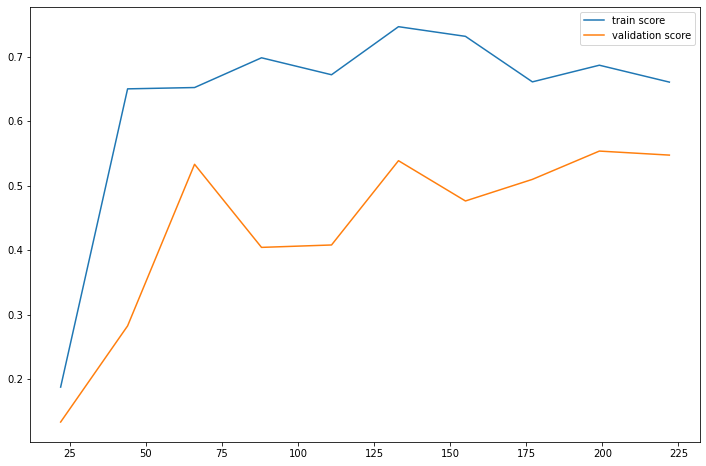

In [473]:
evaluation(models[3])

# 2.3 Fine tuning for SVM 

In [505]:
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

In [478]:
SVM

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest())])),
                ('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=0))])

In [506]:
hyper_params = {'svc__gamma' : [0.001 , 0.001 ],
               'svc__C' : [1 , 10 , 100 , 1000], 
               'pipeline__polynomialfeatures__degree' : [2,3,4],
               'pipeline__selectkbest__k' : range(1,40)}

In [507]:
grid = RandomizedSearchCV(SVM ,hyper_params , scoring = 'recall' , cv = 4 , n_iter = 50)

In [508]:
grid.fit(X_train , y_train)
grid.best_params_

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 21  26  32  34  53  56  61  62  63  67  69  71  72  87  88  90  93  95
  96  97  98  99 100 101 102 103 105 121 123 128 129 130 131 132 134 135
 136 153 154 155 156 158 159 160 161 162 163 164 166 167 168 186 191 197
 199 216 221 227 229 245 250 256 258 273 278 284 286 300 305 311 313 326
 331 337 339 351 356 362 364 375 380 386 388 398 403 409 411 420 425 431
 433 441 446 452 454 461 466 472 474 480 485 491 493 498 503 509 511 513
 514 515 516 518 519 520 522 523 524 525 526 527 528 530 531 532 533 534
 535 536 537 539 540 541 542 543 544 546 547 549 550 551 552 553 554 555
 557 559 560 561 562 563 564 565 566 567 568 569 570 571 572 573 575 576
 578 579 580 581 582 583 584 585 586 588 589 590 592 593 595 596 597 598
 600 601 602 603 604 605 606 607 608 609 611 612 613 614 615 616 617 618
 619 620 621 622 623 624 625 626 627 628 630 631 632 633 634 635 636 638
 639 6

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   21    26    32 ... 82247 82248 82249] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [  21   26   32 ... 8432 8433 8434] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [  21   26   27 ... 8432 8433 8434] are constant

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   21    26    32 ... 82247 82248 82249] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   21    26    27 ... 82247 82248 82249] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   21    26    28 ... 82247 82248 82249] 

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   21    26    32 ... 82247 82248 82249] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   21    26    32 ... 82247 82248 82249] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   21    26    27 ... 82247 82248 82249] 

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 21  26  32  34  53  56  61  62  63  67  69  71  72  87  88  90  93  95
  96  97  98  99 101 103 105 121 123 124 126 127 128 129 130 131 132 134
 135 136 153 154 155 156 158 159 160 161 162 163 164 166 167 168 186 191
 197 199 216 221 227 229 245 250 256 258 273 278 284 286 300 305 311 313
 326 331 337 339 351 356 362 364 375 380 386 388 398 403 409 411 420 425
 431 433 441 446 452 454 461 466 472 474 480 485 491 493 498 503 509 511
 513 514 515 516 518 519 520 522 523 524 525 526 527 528 530 531 532 533
 534 535 536 537 539 540 542 543 544 546 547 548 549 550 551 552 553 554
 555 556 557 558 559 560 561 562 563 564 565 566 567 568 569 570 571 572
 573 575 576 577 578 579 580 581 582 583 584 585 586 588 589 590 592 593
 595 596 597 598 600 601 602 603 604 605 606 607 608 609 611 612 613 614
 615 616 617 618 619 620 621 622 623 624 625 626 627 628 630 631 632 633
 634 6

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 21  26  32  34  53  56  61  62  63  67  69  71  72  87  88  90  93  95
  96  97  98  99 101 103 105 121 123 124 126 127 128 129 130 131 132 134
 135 136 153 154 155 156 158 159 160 161 162 163 164 166 167 168 186 191
 197 199 216 221 227 229 245 250 256 258 273 278 284 286 300 305 311 313
 326 331 337 339 351 356 362 364 375 380 386 388 398 403 409 411 420 425
 431 433 441 446 452 454 461 466 472 474 480 485 491 493 498 503 509 511
 513 514 515 516 518 519 520 522 523 524 525 526 527 528 530 531 532 533
 534 535 536 537 539 540 542 543 544 546 547 548 549 550 551 552 553 554
 555 556 557 558 559 560 561 562 563 564 565 566 567 568 569 570 571 572
 573 575 576 577 578 579 580 581 582 583 584 585 586 588 589 590 592 593
 595 596 597 598 600 601 602 603 604 605 606 607 608 609 611 612 613 614
 615 616 617 618 619 620 621 622 623 624 625 626 627 628 630 631 632 633
 634 6

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [  21   26   32 ... 8432 8433 8434] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [  21   26   27 ... 8432 8433 8434] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [  21   26   28 ... 8432 8433 8434] are constant.
  wa

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 21  26  32  34  53  56  61  62  63  67  69  71  72  87  88  90  93  95
  96  97  98  99 101 103 105 121 123 124 126 127 128 129 130 131 132 134
 135 136 153 154 155 156 158 159 160 161 162 163 164 166 167 168 186 191
 197 199 216 221 227 229 245 250 256 258 273 278 284 286 300 305 311 313
 326 331 337 339 351 356 362 364 375 380 386 388 398 403 409 411 420 425
 431 433 441 446 452 454 461 466 472 474 480 485 491 493 498 503 509 511
 513 514 515 516 518 519 520 522 523 524 525 526 527 528 530 531 532 533
 534 535 536 537 539 540 542 543 544 546 547 548 549 550 551 552 553 554
 555 556 557 558 559 560 561 562 563 564 565 566 567 568 569 570 571 572
 573 575 576 577 578 579 580 581 582 583 584 585 586 588 589 590 592 593
 595 596 597 598 600 601 602 603 604 605 606 607 608 609 611 612 613 614
 615 616 617 618 619 620 621 622 623 624 625 626 627 628 630 631 632 633
 634 6

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 21  26  27  32  34  53  56  61  62  63  67  69  71  72  87  88  90  93
  94  95  96  97  98  99 101 103 105 121 123 128 129 130 131 132 134 135
 136 153 154 155 156 158 159 160 161 162 163 164 165 166 167 168 186 191
 192 197 199 216 221 222 227 229 245 250 251 256 258 273 278 279 284 286
 300 305 306 311 313 326 331 332 337 339 351 356 357 362 364 375 380 381
 386 388 398 403 404 409 411 420 425 426 431 433 441 446 447 452 454 461
 466 467 472 474 480 485 486 491 493 498 503 504 509 511 513 514 515 516
 517 518 519 520 521 522 523 524 525 526 527 528 530 531 532 533 534 535
 536 537 539 540 542 543 544 546 547 549 550 551 552 553 554 555 557 559
 560 561 562 563 564 565 566 567 568 569 570 571 572 573 575 576 578 579
 580 581 582 583 584 585 586 588 589 590 591 592 593 594 595 596 597 598
 600 601 602 603 604 605 606 607 608 609 611 612 613 614 615 616 617 618
 619 6

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 21  26  32  34  53  56  61  62  63  67  69  71  72  87  88  90  93  95
  96  97  98  99 101 103 105 121 123 124 126 127 128 129 130 131 132 134
 135 136 153 154 155 156 158 159 160 161 162 163 164 166 167 168 186 191
 197 199 216 221 227 229 245 250 256 258 273 278 284 286 300 305 311 313
 326 331 337 339 351 356 362 364 375 380 386 388 398 403 409 411 420 425
 431 433 441 446 452 454 461 466 472 474 480 485 491 493 498 503 509 511
 513 514 515 516 518 519 520 522 523 524 525 526 527 528 530 531 532 533
 534 535 536 537 539 540 542 543 544 546 547 548 549 550 551 552 553 554
 555 556 557 558 559 560 561 562 563 564 565 566 567 568 569 570 571 572
 573 575 576 577 578 579 580 581 582 583 584 585 586 588 589 590 592 593
 595 596 597 598 600 601 602 603 604 605 606 607 608 609 611 612 613 614
 615 616 617 618 619 620 621 622 623 624 625 626 627 628 630 631 632 633
 634 6

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 21  26  27  32  34  53  56  61  62  63  67  69  71  72  87  88  90  93
  94  95  96  97  98  99 101 103 105 121 123 128 129 130 131 132 134 135
 136 153 154 155 156 158 159 160 161 162 163 164 165 166 167 168 186 191
 192 197 199 216 221 222 227 229 245 250 251 256 258 273 278 279 284 286
 300 305 306 311 313 326 331 332 337 339 351 356 357 362 364 375 380 381
 386 388 398 403 404 409 411 420 425 426 431 433 441 446 447 452 454 461
 466 467 472 474 480 485 486 491 493 498 503 504 509 511 513 514 515 516
 517 518 519 520 521 522 523 524 525 526 527 528 530 531 532 533 534 535
 536 537 539 540 542 543 544 546 547 549 550 551 552 553 554 555 557 559
 560 561 562 563 564 565 566 567 568 569 570 571 572 573 575 576 578 579
 580 581 582 583 584 585 586 588 589 590 591 592 593 594 595 596 597 598
 600 601 602 603 604 605 606 607 608 609 611 612 613 614 615 616 617 618
 619 6

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   21    26    28 ... 82247 82248 82249] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   21    26    32 ... 82247 82248 82249] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [  21   26   32 ... 8432 8433 8434] are co

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 21  26  32  34  53  56  61  62  63  67  69  71  72  87  88  90  93  95
  96  97  98  99 101 103 105 121 123 124 126 127 128 129 130 131 132 134
 135 136 153 154 155 156 158 159 160 161 162 163 164 166 167 168 186 191
 197 199 216 221 227 229 245 250 256 258 273 278 284 286 300 305 311 313
 326 331 337 339 351 356 362 364 375 380 386 388 398 403 409 411 420 425
 431 433 441 446 452 454 461 466 472 474 480 485 491 493 498 503 509 511
 513 514 515 516 518 519 520 522 523 524 525 526 527 528 530 531 532 533
 534 535 536 537 539 540 542 543 544 546 547 548 549 550 551 552 553 554
 555 556 557 558 559 560 561 562 563 564 565 566 567 568 569 570 571 572
 573 575 576 577 578 579 580 581 582 583 584 585 586 588 589 590 592 593
 595 596 597 598 600 601 602 603 604 605 606 607 608 609 611 612 613 614
 615 616 617 618 619 620 621 622 623 624 625 626 627 628 630 631 632 633
 634 6

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 21  26  32  34  53  56  61  62  63  67  69  71  72  87  88  90  93  95
  96  97  98  99 100 101 102 103 105 121 123 128 129 130 131 132 134 135
 136 153 154 155 156 158 159 160 161 162 163 164 166 167 168 186 191 197
 199 216 221 227 229 245 250 256 258 273 278 284 286 300 305 311 313 326
 331 337 339 351 356 362 364 375 380 386 388 398 403 409 411 420 425 431
 433 441 446 452 454 461 466 472 474 480 485 491 493 498 503 509 511 513
 514 515 516 518 519 520 522 523 524 525 526 527 528 530 531 532 533 534
 535 536 537 539 540 541 542 543 544 546 547 549 550 551 552 553 554 555
 557 559 560 561 562 563 564 565 566 567 568 569 570 571 572 573 575 576
 578 579 580 581 582 583 584 585 586 588 589 590 592 593 595 596 597 598
 600 601 602 603 604 605 606 607 608 609 611 612 613 614 615 616 617 618
 619 620 621 622 623 624 625 626 627 628 630 631 632 633 634 635 636 638
 639 6

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [  21   26   32 ... 8432 8433 8434] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   21    26    32 ... 82247 82248 82249] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   21    26    27 ... 82247 82248 82249] are co

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 21  26  28  32  34  53  56  61  62  63  67  69  71  72  87  88  89  90
  91  93  95  96  97  98  99 101 103 105 121 123 128 129 130 131 132 133
 134 135 136 153 154 155 156 158 159 160 161 162 163 164 166 167 168 186
 191 193 197 199 216 221 223 227 229 245 250 252 256 258 273 278 280 284
 286 300 305 307 311 313 326 331 333 337 339 351 356 358 362 364 375 380
 382 386 388 398 403 405 409 411 420 425 427 431 433 441 446 448 452 454
 461 466 468 472 474 480 485 487 491 493 498 503 505 509 511 513 514 515
 516 518 519 520 522 523 524 525 526 527 528 530 531 532 533 534 535 536
 537 538 539 540 542 543 544 546 547 549 550 551 552 553 554 555 557 559
 560 561 562 563 564 565 566 567 568 569 570 571 572 573 575 576 578 579
 580 581 582 583 584 585 586 588 589 590 592 593 595 596 597 598 600 601
 602 603 604 605 606 607 608 609 611 612 613 614 615 616 617 618 619 620
 621 6

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 21  26  32  34  53  56  61  62  63  67  69  71  72  87  88  90  93  95
  96  97  98  99 100 101 102 103 105 121 123 128 129 130 131 132 134 135
 136 153 154 155 156 158 159 160 161 162 163 164 166 167 168 186 191 197
 199 216 221 227 229 245 250 256 258 273 278 284 286 300 305 311 313 326
 331 337 339 351 356 362 364 375 380 386 388 398 403 409 411 420 425 431
 433 441 446 452 454 461 466 472 474 480 485 491 493 498 503 509 511 513
 514 515 516 518 519 520 522 523 524 525 526 527 528 530 531 532 533 534
 535 536 537 539 540 541 542 543 544 546 547 549 550 551 552 553 554 555
 557 559 560 561 562 563 564 565 566 567 568 569 570 571 572 573 575 576
 578 579 580 581 582 583 584 585 586 588 589 590 592 593 595 596 597 598
 600 601 602 603 604 605 606 607 608 609 611 612 613 614 615 616 617 618
 619 620 621 622 623 624 625 626 627 628 630 631 632 633 634 635 636 638
 639 6

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 21  26  28  32  34  53  56  61  62  63  67  69  71  72  87  88  89  90
  91  93  95  96  97  98  99 101 103 105 121 123 128 129 130 131 132 133
 134 135 136 153 154 155 156 158 159 160 161 162 163 164 166 167 168 186
 191 193 197 199 216 221 223 227 229 245 250 252 256 258 273 278 280 284
 286 300 305 307 311 313 326 331 333 337 339 351 356 358 362 364 375 380
 382 386 388 398 403 405 409 411 420 425 427 431 433 441 446 448 452 454
 461 466 468 472 474 480 485 487 491 493 498 503 505 509 511 513 514 515
 516 518 519 520 522 523 524 525 526 527 528 530 531 532 533 534 535 536
 537 538 539 540 542 543 544 546 547 549 550 551 552 553 554 555 557 559
 560 561 562 563 564 565 566 567 568 569 570 571 572 573 575 576 578 579
 580 581 582 583 584 585 586 588 589 590 592 593 595 596 597 598 600 601
 602 603 604 605 606 607 608 609 611 612 613 614 615 616 617 618 619 620
 621 6

{'svc__gamma': 0.001,
 'svc__C': 100,
 'pipeline__selectkbest__k': 37,
 'pipeline__polynomialfeatures__degree': 2}

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 21  26  32  34  53  56  61  62  63  67  69  71  72  87  88  90  93  95
  96  97  98  99 101 103 105 121 123 128 129 130 131 132 134 135 136 153
 154 155 156 158 159 160 161 162 163 164 166 167 168 186 191 197 199 216
 221 227 229 245 250 256 258 273 278 284 286 300 305 311 313 326 331 337
 339 351 356 362 364 375 380 386 388 398 403 409 411 420 425 431 433 441
 446 452 454 461 466 472 474 480 485 491 493 498 503 509 511 513 514 515
 516 518 519 520 522 523 524 525 526 527 528 530 531 532 533 534 535 536
 537 539 540 542 543 544 546 547 549 550 551 552 553 554 555 557 559 560
 561 562 563 564 565 566 567 568 569 570 571 572 573 575 576 578 579 580
 581 582 583 584 585 586 588 589 590 592 593 595 596 597 598 600 601 602
 603 604 605 606 607 608 609 611 612 613 614 615 616 617 618 619 620 621
 622 623 624 625 626 627 628 630 631 632 633 634 635 636 638 639 640 641
 642 6

[[51  3]
 [ 7  5]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        54
           1       0.62      0.42      0.50        12

    accuracy                           0.85        66
   macro avg       0.75      0.68      0.71        66
weighted avg       0.83      0.85      0.84        66



C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 19  21  24  26  27  28  29  32  33  34  53  54  56  59  61  62  63  64
  67  68  69  71  72  87  88  89  90  91  93  95  96  97  98  99 100 101
 102 103 105 120 121 122 123 124 126 127 128 129 130 131 132 133 134 135
 136 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 184
 186 189 191 192 193 194 197 198 199 214 216 219 221 222 223 224 227 228
 229 243 245 248 250 251 252 253 256 257 258 271 273 276 278 279 280 281
 284 285 286 298 300 303 305 306 307 308 311 312 313 324 326 329 331 332
 333 334 337 338 339 349 351 354 356 357 358 359 362 363 364 373 375 378
 380 381 382 383 386 387 388 396 398 401 403 404 405 406 409 410 411 418
 420 423 425 426 427 428 431 432 433 439 441 444 446 447 448 449 452 453
 454 459 461 464 466 467 468 469 472 473 474 478 480 483 485 486 487 488
 491 492 493 496 498 501 503 504 505 506 509 510 511 513 514 515 516 517
 518 5

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 21  26  32  34  53  56  61  62  63  67  69  71  72  87  88  90  93  95
  96  97  98  99 100 101 102 103 105 121 123 128 129 130 131 132 134 135
 136 153 154 155 156 158 159 160 161 162 163 164 166 167 168 186 191 197
 199 216 221 227 229 245 250 256 258 273 278 284 286 300 305 311 313 326
 331 337 339 351 356 362 364 375 380 386 388 398 403 409 411 420 425 431
 433 441 446 452 454 461 466 472 474 480 485 491 493 498 503 509 511 513
 514 515 516 518 519 520 522 523 524 525 526 527 528 530 531 532 533 534
 535 536 537 539 540 541 542 543 544 546 547 549 550 551 552 553 554 555
 557 559 560 561 562 563 564 565 566 567 568 569 570 571 572 573 575 576
 578 579 580 581 582 583 584 585 586 588 589 590 592 593 595 596 597 598
 600 601 602 603 604 605 606 607 608 609 611 612 613 614 615 616 617 618
 619 620 621 622 623 624 625 626 627 628 630 631 632 633 634 635 636 638
 639 6

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 21  26  27  29  30  32  34  53  56  61  62  63  64  65  67  69  71  72
  87  88  90  93  94  95  96  97  98  99 101 103 105 121 123 124 126 127
 128 129 130 131 132 134 135 136 152 153 154 155 156 158 159 160 161 162
 163 164 165 166 167 168 186 191 192 194 195 197 199 216 221 222 224 225
 227 229 245 250 251 253 254 256 258 273 278 279 281 282 284 286 300 305
 306 308 309 311 313 326 331 332 334 335 337 339 351 356 357 359 360 362
 364 375 380 381 383 384 386 388 398 403 404 406 407 409 411 420 425 426
 428 429 431 433 441 446 447 449 450 452 454 461 466 467 469 470 472 474
 480 485 486 488 489 491 493 498 503 504 506 507 509 511 513 514 515 516
 517 518 519 520 521 522 523 524 525 526 527 528 530 531 532 533 534 535
 536 537 539 540 542 543 544 546 547 548 549 550 551 552 553 554 555 556
 557 558 559 560 561 562 563 564 565 566 567 568 569 570 571 572 573 575
 576 5

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 21  24  25  26  27  28  29  30  32  34  53  56  59  60  61  62  63  64
  65  67  69  71  72  87  88  89  90  91  93  94  95  96  97  98  99 101
 103 105 121 123 124 125 126 127 128 129 130 131 132 133 134 135 136 152
 153 154 155 156 158 159 160 161 162 163 164 165 166 167 168 186 189 190
 191 192 193 194 195 197 199 216 219 220 221 222 223 224 225 227 229 245
 248 249 250 251 252 253 254 256 258 273 276 277 278 279 280 281 282 284
 286 300 303 304 305 306 307 308 309 311 313 326 329 330 331 332 333 334
 335 337 339 351 354 355 356 357 358 359 360 362 364 375 378 379 380 381
 382 383 384 386 388 398 401 402 403 404 405 406 407 409 411 420 423 424
 425 426 427 428 429 431 433 441 444 445 446 447 448 449 450 452 454 461
 464 465 466 467 468 469 470 472 474 480 483 484 485 486 487 488 489 491
 493 498 501 502 503 504 505 506 507 509 511 513 514 515 516 517 518 519
 520 5

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 21  26  28  32  34  53  56  61  62  63  67  69  71  72  87  88  89  90
  91  93  95  96  97  98  99 101 103 105 121 123 128 129 130 131 132 133
 134 135 136 153 154 155 156 158 159 160 161 162 163 164 166 167 168 186
 191 193 197 199 216 221 223 227 229 245 250 252 256 258 273 278 280 284
 286 300 305 307 311 313 326 331 333 337 339 351 356 358 362 364 375 380
 382 386 388 398 403 405 409 411 420 425 427 431 433 441 446 448 452 454
 461 466 468 472 474 480 485 487 491 493 498 503 505 509 511 513 514 515
 516 518 519 520 522 523 524 525 526 527 528 530 531 532 533 534 535 536
 537 538 539 540 542 543 544 546 547 549 550 551 552 553 554 555 557 559
 560 561 562 563 564 565 566 567 568 569 570 571 572 573 575 576 578 579
 580 581 582 583 584 585 586 588 589 590 592 593 595 596 597 598 600 601
 602 603 604 605 606 607 608 609 611 612 613 614 615 616 617 618 619 620
 621 6

C:\Users\PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 21  26  28  32  34  53  56  61  62  63  67  69  71  72  87  88  90  93
  95  96  97  98  99 101 103 105 121 123 124 126 127 128 129 130 131 132
 134 135 136 153 154 155 156 158 159 160 161 162 163 164 166 167 168 186
 191 193 197 199 216 221 223 227 229 245 250 252 256 258 273 278 280 284
 286 300 305 307 311 313 326 331 333 337 339 351 356 358 362 364 375 380
 382 386 388 398 403 405 409 411 420 425 427 431 433 441 446 448 452 454
 461 466 468 472 474 480 485 487 491 493 498 503 505 509 511 513 514 515
 516 518 519 520 522 523 524 525 526 527 528 530 531 532 533 534 535 536
 537 538 539 540 542 543 544 546 547 548 549 550 551 552 553 554 555 556
 557 558 559 560 561 562 563 564 565 566 567 568 569 570 571 572 573 575
 576 577 578 579 580 581 582 583 584 585 586 588 589 590 592 593 595 596
 597 598 600 601 602 603 604 605 606 607 608 609 611 612 613 614 615 616
 617 6

[ 22  44  66  88 111 133 155 177 199 222]


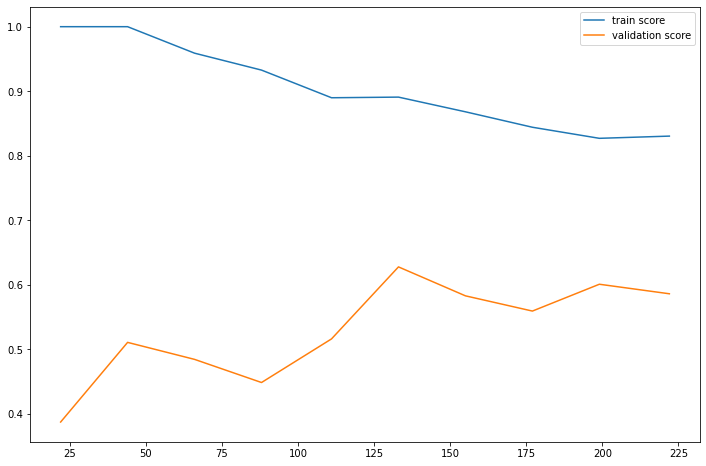

In [509]:
evaluation(grid.best_estimator_)